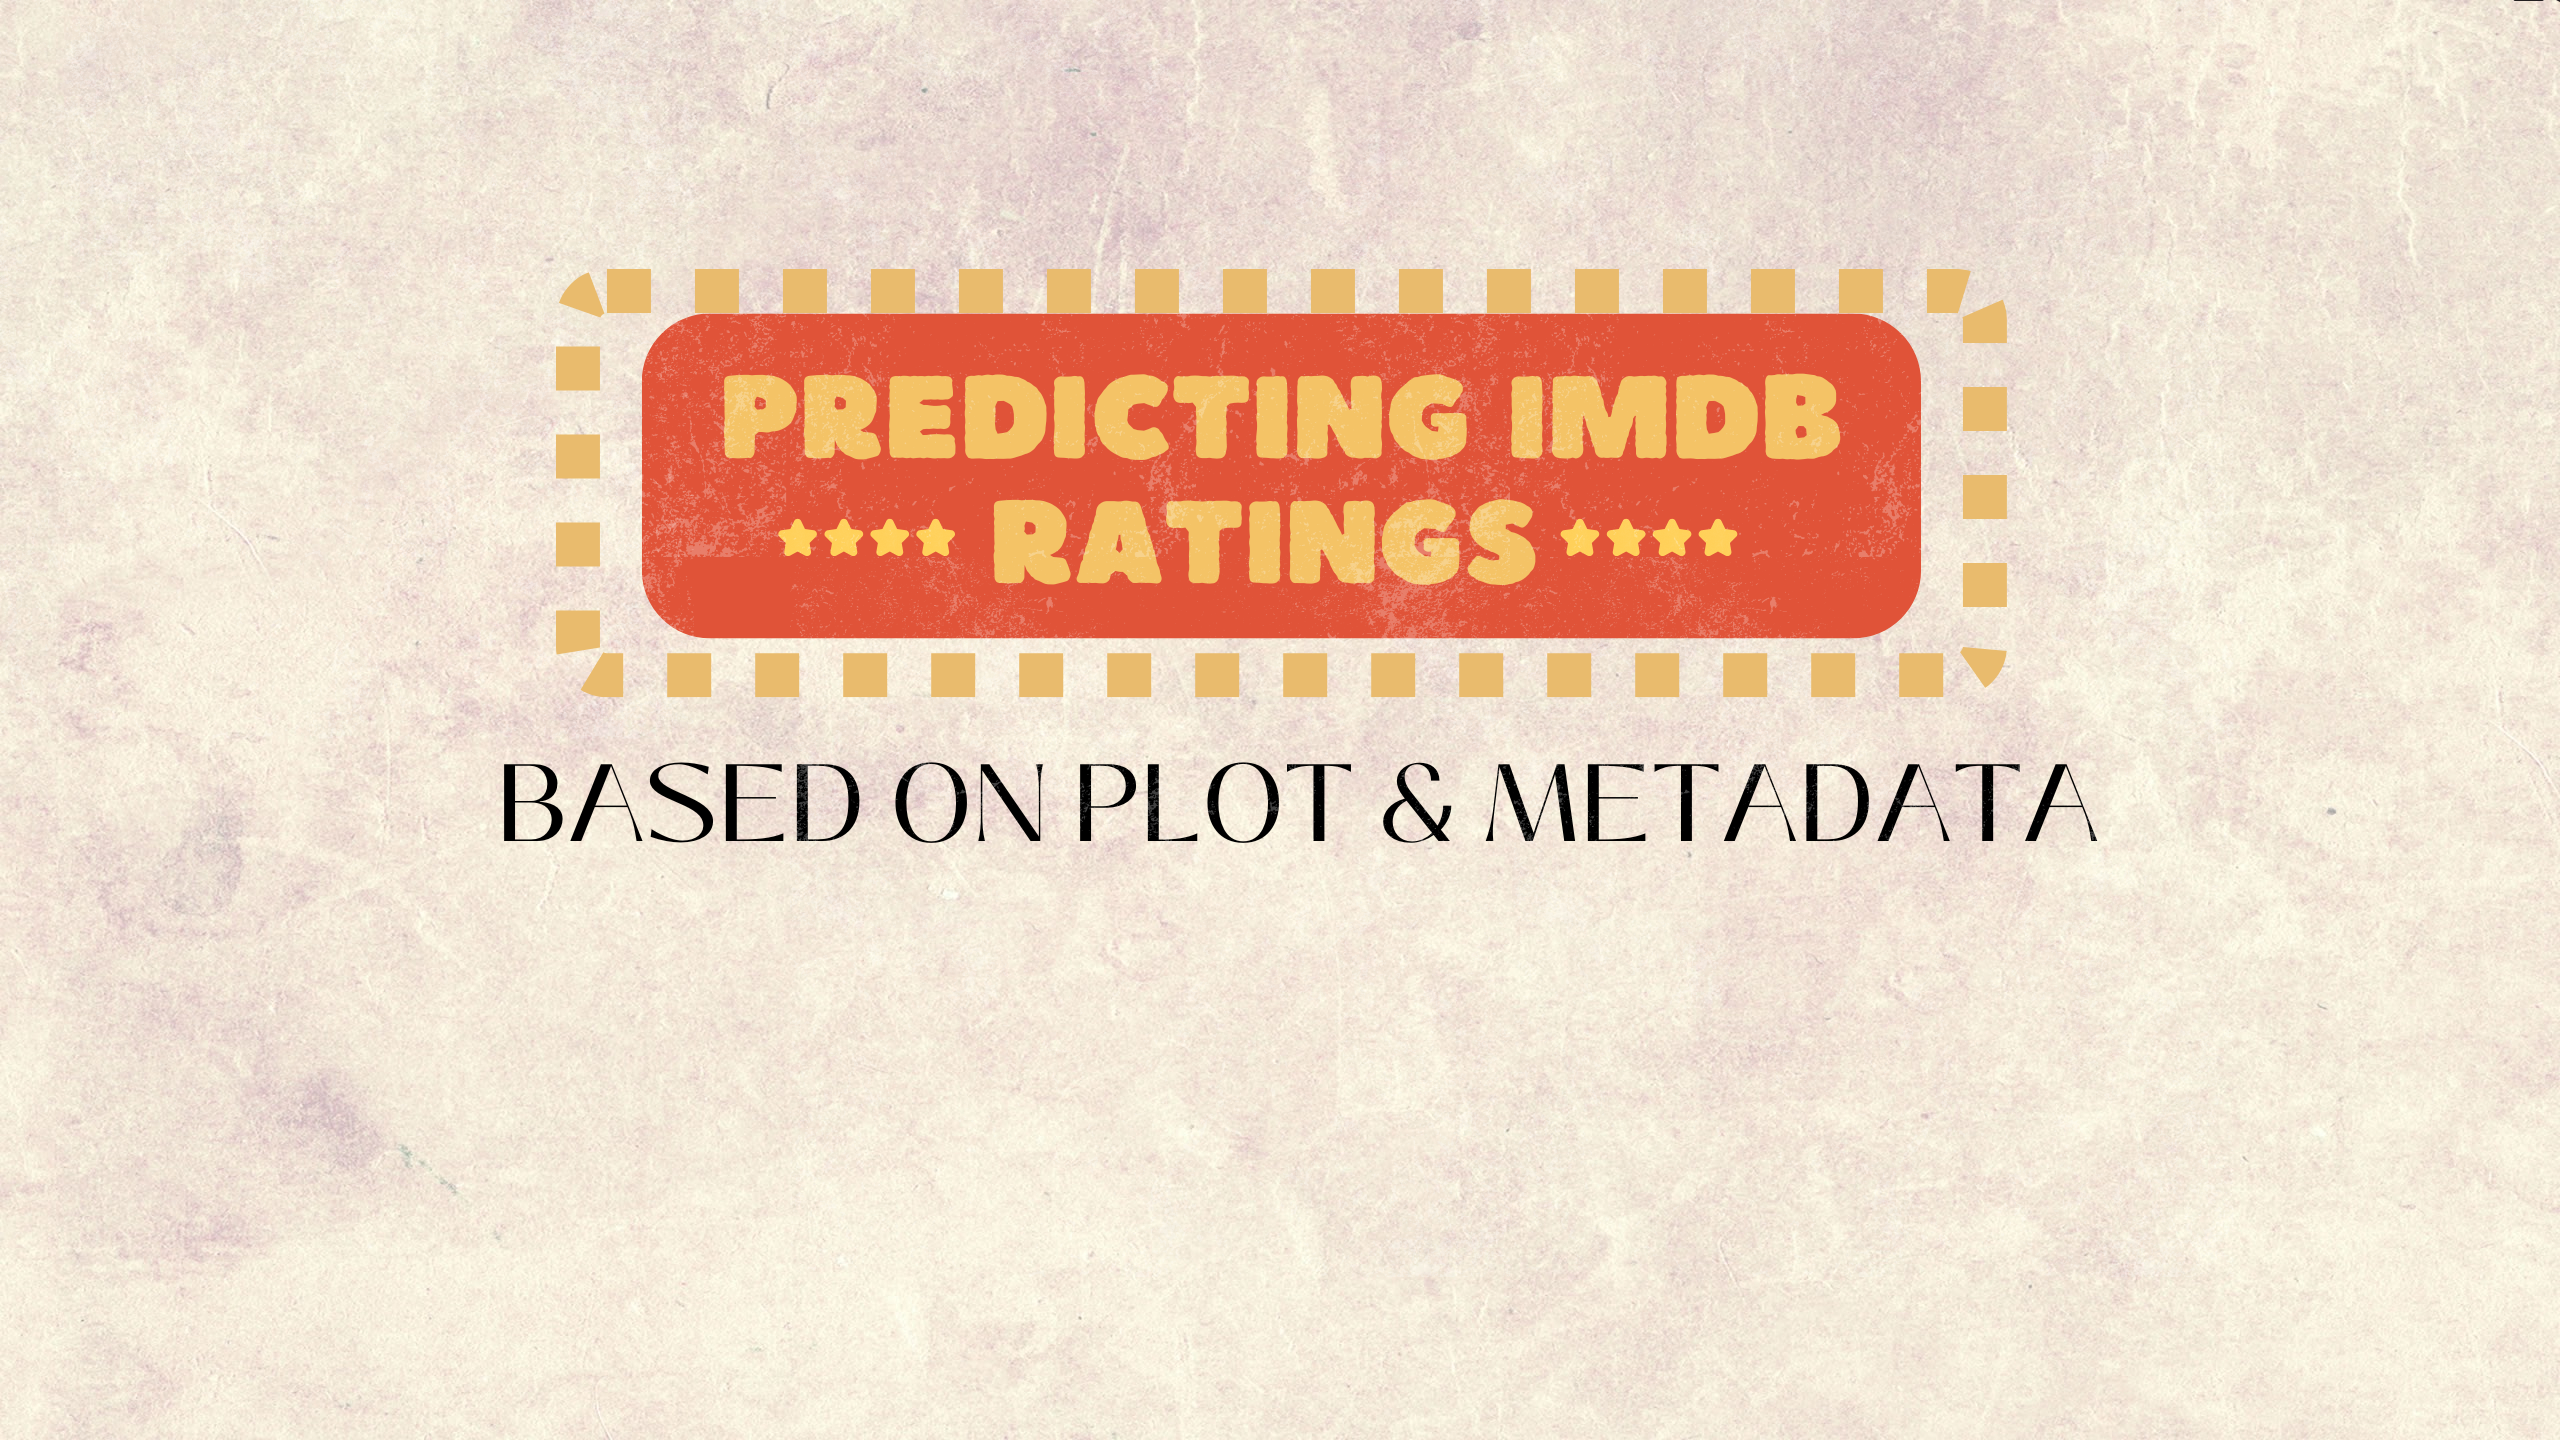

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 15px 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0; font-weight: bold; font-family: Arial, sans-serif;">PREDICTING IMDB RATINGS BASED ON THEIR PLOT SUMMARY AND IMDB DATA

</h1>
  <hr style="border: 0; border-top: 2px solid black; margin: 10px auto; width: 85%;">
</div>


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">ABSTRACT</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

This study explores the feasibility of predicting IMDb movie ratings using a combination of textual and structured metadata features available during pre-production. Over 3,000 English-language films released between 2014 and 2024 were scraped from IMDb, capturing attributes such as plot summaries, cast, directors, budget, runtime, genre, and distributors. Plot summaries were vectorized using TF-IDF and reduced via PCA, while categorical metadata were encoded using Bag-of-Words and ordinal encodings. Ratings were binarized into “good” and “bad” categories using the median as threshold, framing the task as a classification problem. Multiple models—including K-Nearest Neighbors, Logistic Regression, Support Vector Machines, and Random Forest—were evaluated based on accuracy, precision, recall, and feature importance. Logistic Regression with L2 regularization emerged as the best-performing model, achieving a test accuracy of 72.11\% and providing interpretable insights into the predictors of movie success. These results demonstrate the potential of using accessible pre-production features to support data-driven decisions in the film industry.

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">INTRODUCTION</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The film industry involves substantial financial risk, with production budgets for blockbuster movies often reaching hundreds of millions of US dollars-as seen with recent titles like Avengers: Endgame (budget: \$356 million) <a href="https://www.imdb.com/title/tt4154796">[1]</a>. Given these high stakes, reliable early-stage prediction models for a film’s success are invaluable. Such models can guide production companies in funding decisions and provide filmmakers with actionable feedback during the ideation phase. 

This study investigates the feasibility of predicting a film’s IMDb rating using only features available prior to its release. The central research question is: ***Can a film’s IMDb rating be accurately predicted using pre-release features alone?***

An accurate pre-release prediction model offers multiple benefits. It enables stakeholders to minimize financial risk by identifying potential failures early, optimizes marketing and casting strategies, and improves overall decision-making in film production


<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">METHODOLOGY</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 1 shows our methodology which consists of six main steps: Data Collection, Feature Extraction, Exploratory Data Analysis (EDA), Data Cleaning & Transformation, Model Training & Evaluation, and Model Analysis. Each step is designed to systematically process and analyze the data for robust prediction of IMDb ratings.


![Methodology Flowchart](<attachment:Methodology Flowchart.JPEG>)

<div style="text-align: center;">

***Figure 1:*** *Methodology Pipeline*

</div>

---

### Data Overview

The primary dataset used in this study consists of IMDb film data from over 3,000 English-language movies released between 2014 and 2024. To ensure data quality and relevance, only films with at least 1,000 user reviews were included, filtering out very niche titles.

Table 1 summarizes the features collected for each film, including plot summaries, cast, crew, budget, runtime, genres, distributors, and IMDb ratings.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0; margin: 0 auto;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-0pky"><span style="font-weight:bold">Feature</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">Description</span></th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-0pky">Movie Title</td>
    <td class="tg-0pky">Movie title, as listed in IMDB</td>
  </tr>
  <tr>
    <td class="tg-0pky">Plot Summary</td>
    <td class="tg-0pky">A concatenation of all the plot summaries available for a film</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ratings</td>
    <td class="tg-0pky">IMDB rating</td>
  </tr>
  <tr>
    <td class="tg-0lax">Budget</td>
    <td class="tg-0lax">Budget as listed in IMDB</td>
  </tr>
  <tr>
    <td class="tg-0lax">Runtime</td>
    <td class="tg-0lax">Movie Runtime in minutes</td>
  </tr>
  <tr>
    <td class="tg-0lax">Cast</td>
    <td class="tg-0lax">Comma-separated list of Actors</td>
  </tr>
  <tr>
    <td class="tg-0pky">Producers</td>
    <td class="tg-0pky">Comma-separated list of Producers</td>
  </tr>
  <tr>
    <td class="tg-0pky">Directors</td>
    <td class="tg-0pky">Comma-separated list of Directors</td>
  </tr>
  <tr>
    <td class="tg-0lax">Distributors</td>
    <td class="tg-0lax">Comma-separated list of Distributors</td>
  </tr>
  <tr>
    <td class="tg-0lax">Genre</td>
    <td class="tg-0lax">Comma-separated list of Genres</td>
  </tr>
</tbody></table>

<div style="text-align: center;">

***Table 1:*** *Description of Features Used from IMDD*

</div>

---

### Pipeline Steps

**Data Collection:** Movies were sampled from the IMDb website and collected via web scraping, capturing the features listed above.

**Data Splitting:** To prevent data leakage, a three-way split (train, validation, test) was performed before any data transformation. All transformations (e.g., PCA or TF-IDF) were fitted using only the training data before being applied to the entire dataset.

**Feature Extraction:**

* Plot summaries were vectorized using TF-IDF, followed by
PCA to reduce dimensionality and uncover latent features. We see that in similar literature like that of Thomal (2024), PCA as the main form of dimensionality reduction on TF-IDF IMDB text data has been shown to be effective <a href="https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews">[2].</a>

* Comma-separated values (e.g., cast, genre) were processed
using a bag-of-words vectorizer.

* MPA ratings were label-encoded as ordinal features.

**Exploratory Data Analysis (EDA):**

* Distribution plots (histogram, violin) for ratings and budget

* Pareto charts for comma-separated data

* Word clouds for plot summary tokens

**Data Cleaning & Transformation:** Data was transformed and
cleaned based on EDA findings (e.g., correcting erroneous entries, handling missing values).

**Model Training & Evaluation:** Various classification models were trained and evaluated using accuracy, recall, precision, and confusion matrices. The final model was chosen based on validation performance.

**Model Analysis:**
* Feature weights graph
* Performance metrics (accuracy, recall, precision, confusion
matrices)
* Principal component biplots

Having established our methodology and dataset, we now present the results of applying this pipeline, including data collection outcomes, feature engineering, exploratory analysis, and model performance
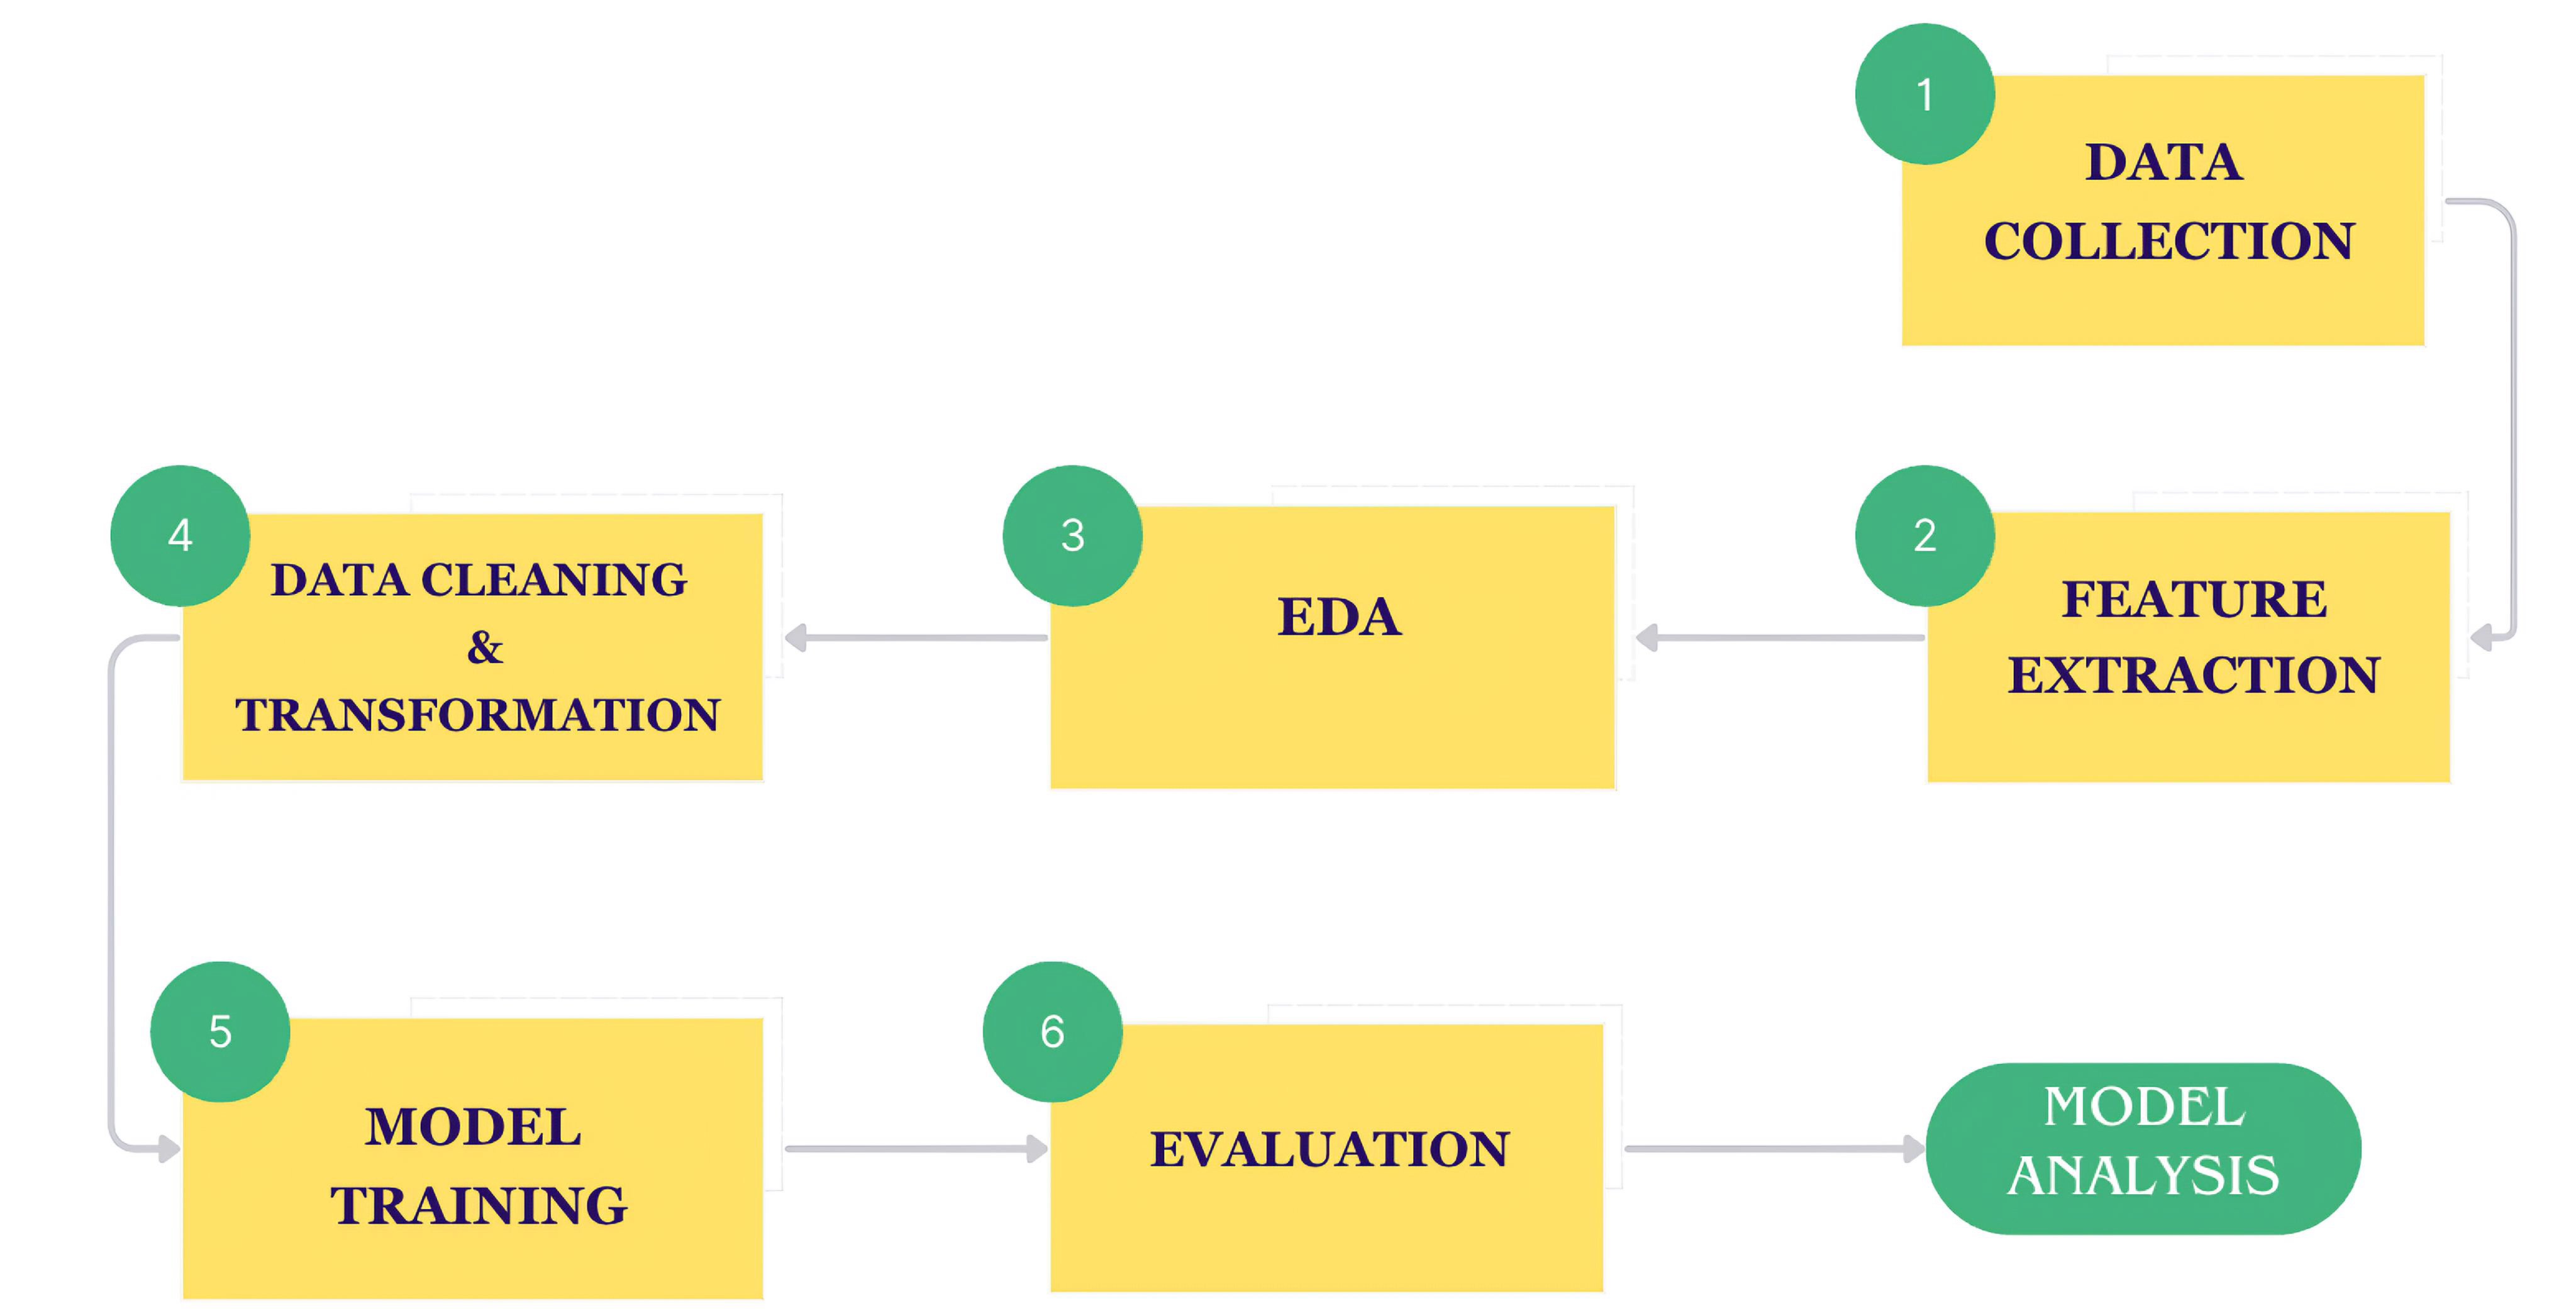

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">RESULTS</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Data Collection
The following notebook runs all the code related to the data collection:

In [1]:
%run Preprocessing.ipynb

DONE compiling


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

A dataset of over 3,000 English-language feature films released between 2014 and 2024 was compiled using IMDb’s advanced search page. The search was configured with parameters to include only widely-reviewed films, specifically those with at least 1,000 votes, and filtered by title type, language, release date range, and sorted by year in ascending order. The exact parameters used in the search were:

```python
        params = {
            'title_type': 'feature',
            'num_votes': 1000,
            'primary_language': 'en',
            'sort': 'year,asc',
            'release_date': f"{start_date},{end_date}"
        }
```
To ensure robustness and facilitate error handling, the data collection process was distributed across five notebooks, each responsible for scraping a two-year span within the ten-year period. The resulting datasets were then consolidated into a single CSV file named raw_complete.csv. The dataset includes all features listed in Table 1.

In [2]:
data = pd.read_csv('raw_complete.csv')
data.head()

Unnamed: 0.1  Unnamed: 0                         Title  Year  \
0             0           0                   1. Whiplash  2014   
1             1           1                    2. RoboCop  2014   
2             2           2               3. The Babadook  2014   
3             3           3  4. What We Do in the Shadows  2014   
4             4           4                    5. Boyhood  2014   

                                                Plot  Rating  \
0  A promising young drummer enrolls at a cut-thr...     8.5   
1  In 2028 Detroit, when Alex Murphy, a loving hu...     6.1   
2  A single mother and her child fall into a deep...     6.8   
3  Viago, Deacon, and Vladislav are vampires who ...     7.6   
4  The life of Mason, from early childhood to his...     7.9   

                     Budget  \
0    $3,300,000 (estimated)   
1  $100,000,000 (estimated)   
2    $2,000,000 (estimated)   
3    $1,600,000 (estimated)   
4    $4,000,000 (estimated)   

                                                Cast MPA Rating  \
0  Miles Teller,J.K. Simmons,Paul Reiser,Melissa ...      TV-14   
1  Joel Kinnaman,Gary Oldman,Michael Keaton,Abbie...      TV-14   
2  Essie Davis,Noah Wiseman,Hayley McElhinney,Dan...        Not   
3  Jemaine Clement,Taika Waititi,Jonny Brugh,Cori...          R   
4  Ellar Coltrane,Patricia Arquette,Elijah Smith,...      TV-14   

                       Directors  \
0                Damien Chazelle   
1                   José Padilha   
2                  Jennifer Kent   
3  Jemaine Clement,Taika Waititi   
4              Richard Linklater   

                                        Distributors  \
0  Sony Pictures Classics,Sony Pictures Worldwide...   
1  Columbia Pictures,ACME,ACME,ACME,B&H Film Dist...   
2  Capelight Pictures,Cinecolor Films,Feelgood En...   
3  Benuca Films,Cinetren,Festival Films / Yedra F...   
4  Diaphana Distribution,IFC Films,Lumière,Lumièr...   

                                           Producers  \
0  Bold Films,Blumhouse Productions,Right of Way ...   
1  Metro-Goldwyn-Mayer (MGM),Columbia Pictures,St...   
2  Screen Australia,Causeway Films,The South Aust...   
3  Unison Films,Defender Films,Park Road Post Pro...   
4              IFC Productions,Detour Filmproduction   

                          Genre  Runtime in Minutes  
0                   Drama,Music                 106  
1  Action,Crime,Sci-Fi,Thriller                 117  
2          Drama,Horror,Mystery                  94  
3                 Comedy,Horror                  86  
4                         Drama                 165

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The extraneous, unnamed columns were dropped as they did not contribute meaningful information to the dataset.

In [3]:
data.drop(data.columns[[0,1]], axis=1, inplace=True)
data.head(2)

Title  Year                                               Plot  \
0  1. Whiplash  2014  A promising young drummer enrolls at a cut-thr...   
1   2. RoboCop  2014  In 2028 Detroit, when Alex Murphy, a loving hu...   

   Rating                    Budget  \
0     8.5    $3,300,000 (estimated)   
1     6.1  $100,000,000 (estimated)   

                                                Cast MPA Rating  \
0  Miles Teller,J.K. Simmons,Paul Reiser,Melissa ...      TV-14   
1  Joel Kinnaman,Gary Oldman,Michael Keaton,Abbie...      TV-14   

         Directors                                       Distributors  \
0  Damien Chazelle  Sony Pictures Classics,Sony Pictures Worldwide...   
1     José Padilha  Columbia Pictures,ACME,ACME,ACME,B&H Film Dist...   

                                           Producers  \
0  Bold Films,Blumhouse Productions,Right of Way ...   
1  Metro-Goldwyn-Mayer (MGM),Columbia Pictures,St...   

                          Genre  Runtime in Minutes  
0                   Drama,Music                 106  
1  Action,Crime,Sci-Fi,Thriller                 117

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Data Split
To ensure unbiased evaluation of the model’s performance, the dataset was partitioned early in the pipeline to prevent data leakage. Specifically, 20% of the data was reserved as a test set, which remained completely unseen during model training and validation. This approach guarantees that the test set provides an accurate assessment of the model’s generalization capability.

The following code snippet illustrates the data splitting procedure used:

In [6]:
#Target Feature
target = ["Rating"]

#Make features everything but the target
features = list(data.columns)
features.remove(target[0])
feature_dict = {}


# Split data -> nontest & test
x_nontest, x_test, y_nontest, y_test = train_test_split(
    data[features],
    data[target],
    test_size=0.20,
    random_state=1337
)
# Split nontest -> training & val
x_train, x_val, y_train, y_val = train_test_split(
    x_nontest,
    y_nontest,
    test_size=0.25,
    random_state=1337)

print(f'Train size: {len(x_train)}')
print(f'Test size: {len(x_test)}')
print(f'Val size: {len(x_val)}')

Train size: 1946
Test size: 649
Val size: 649


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Feature Extraction
The budget feature was extracted by applying regular expressions to isolate numerical values from the raw data. To maintain consistency, only budgets denominated in USD were retained; entries with values in other currencies were marked as 'N/A' to indicate unavailable or incompatible data.

In [7]:
x_train['Budget'] = x_train['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_train['Budget'], errors='coerce')
x_train['Budget'] = budget

x_val['Budget'] = x_val['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_val['Budget'], errors='coerce')
x_val['Budget'] = budget

x_test['Budget'] = x_test['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_test['Budget'], errors='coerce')
x_test['Budget'] = budget

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.tail(2)

Dataset is now 11-dimensional


Title  Year  \
593   23. Brothers of the Wind  2015   
2919            5. The Marvels  2023   

                                                   Plot       Budget  \
593   In a world where it takes courage to fly, a yo...          NaN   
2919  Carol Danvers gets her powers entangled with t...  220000000.0   

                                                   Cast MPA Rating  \
593   Jean Reno,Tobias Moretti,Manuel Camacho,Eva Ku...       TV-G   
2919  Brie Larson,Teyonah Parris,Iman Vellani,Samuel...      PG-13   

                          Directors  \
593   Gerardo Olivares,Otmar Penker   
2919                    Nia DaCosta   

                                           Distributors  \
593   Crystalsky Multimedia,Légende Distribution,War...   
2919  Walt Disney Studios Motion Pictures,Walt Disne...   

                                       Producers                    Genre  \
593   FilmVergnuegen,Terra Mater Factual Studios   Adventure,Drama,Family   
2919                              Marvel Studios  Action,Adventure,Sci-Fi   

      Runtime in Minutes  
593                   98  
2919                 105

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The plot summaries were vectorized using TF-IDF, with stop words excluded to streamline analysis, model training, and interpretation. However, this process significantly increased the dimensionality of the dataset, necessitating further dimensionality reduction techniques.

In [8]:
vectorizer = TfidfVectorizer(
    token_pattern=r'[a-zA-Z]+',
    stop_words=list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS)
)

vectorizer.fit(x_train['Plot'])
tokens = vectorizer.get_feature_names_out()
feature_dict['tokens'] = list(tokens)

trainIDF = vectorizer.transform(x_train['Plot'])
x_train_wordvec = pd.DataFrame(
    trainIDF.toarray(),
    columns=tokens,
    index=x_train.index
)
x_train_temp = pd.concat([x_train, x_train_wordvec], axis=1)

valIDF = vectorizer.transform(x_val['Plot'])
x_val_wordvec = pd.DataFrame(
    valIDF.toarray(),
    columns=tokens,
    index=x_val.index
)
x_val_temp = pd.concat([x_val, x_val_wordvec], axis=1)

testIDF = vectorizer.transform(x_test['Plot'])
x_test_wordvec = pd.DataFrame(
    testIDF.toarray(),
    columns=tokens,
    index=x_test.index
)
x_test_temp = pd.concat([x_test, x_test_wordvec], axis=1)

print(f'Dataset is now {len(x_test_temp.columns)}-dimensional')
x_test.head(2)

Dataset is now 23133-dimensional


Title  Year  \
3208      1. A Complete Unknown  2024   
2265  24. The Girl Who Got Away  2021   

                                                   Plot      Budget  \
3208  In 1961, an unknown 19-year-old Bob Dylan arri...  70000000.0   
2265  A female serial killer escapes from prison to ...         NaN   

                                                   Cast MPA Rating  \
3208  Timothée Chalamet,Joe Tippett,Edward Norton,Er...          R   
2265  Lexi Johnson,Chukwudi Iwuji,Kaye Tuckerman,Tim...      TV-MA   

              Directors                                       Distributors  \
3208      James Mangold  Searchlight Pictures,Walt Disney Studios Motio...   
2265  Michael Morrissey                                Quiver Distribution   

                                              Producers  \
3208  Searchlight Pictures,The Picture Company,Range...   
2265              Boy Wonder Productions,Lords Of Magic   

                      Genre  Runtime in Minutes  
3208  Biography,Drama,Music                 141  
2265        Horror,Thriller                 116

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Similarly, an arbitrary decision was made to remove infrequent terms appearing in less than 0.1% of the corpus, as such rare words are unlikely to contribute meaningful information to the model’s learning process.

In [9]:
vectorizer = TfidfVectorizer(
    token_pattern=r'[a-zA-Z]+',
    min_df=0.001,
    stop_words=list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS)
)

vectorizer.fit(x_train['Plot'])
tokens = vectorizer.get_feature_names_out()
feature_dict['tokens'] = list(tokens)

trainIDF = vectorizer.transform(x_train['Plot'])
x_train_wordvec = pd.DataFrame(
    trainIDF.toarray(),
    columns=tokens,
    index=x_train.index
)
x_train = pd.concat([x_train, x_train_wordvec], axis=1)
x_train.drop(columns=['Plot'], inplace=True)

valIDF = vectorizer.transform(x_val['Plot'])
x_val_wordvec = pd.DataFrame(
    valIDF.toarray(),
    columns=tokens,
    index=x_val.index
)
x_val = pd.concat([x_val, x_val_wordvec], axis=1)
x_val.drop(columns=['Plot'], inplace=True)

testIDF = vectorizer.transform(x_test['Plot'])
x_test_wordvec = pd.DataFrame(
    testIDF.toarray(),
    columns=tokens,
    index=x_test.index
)
x_test = pd.concat([x_test, x_test_wordvec], axis=1)
x_test.drop(columns=['Plot'], inplace=True)

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 12206-dimensional


Title  Year      Budget  \
3208      1. A Complete Unknown  2024  70000000.0   
2265  24. The Girl Who Got Away  2021         NaN   

                                                   Cast MPA Rating  \
3208  Timothée Chalamet,Joe Tippett,Edward Norton,Er...          R   
2265  Lexi Johnson,Chukwudi Iwuji,Kaye Tuckerman,Tim...      TV-MA   

              Directors                                       Distributors  \
3208      James Mangold  Searchlight Pictures,Walt Disney Studios Motio...   
2265  Michael Morrissey                                Quiver Distribution   

                                              Producers  \
3208  Searchlight Pictures,The Picture Company,Range...   
2265              Boy Wonder Productions,Lords Of Magic   

                      Genre  Runtime in Minutes  ...  zero  zoe  zoey  zombie  \
3208  Biography,Drama,Music                 141  ...   0.0  0.0   0.0     0.0   
2265        Horror,Thriller                 116  ...   0.0  0.0   0.0     0.0   

      zombies  zone  zoo  zookeeper  zoom  zora  
3208      0.0   0.0  0.0        0.0   0.0   0.0  
2265      0.0   0.0  0.0        0.0   0.0   0.0  

[2 rows x 12206 columns]

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

A similar approach was applied to the comma-delimited categorical features using a bag-of-words vectorization. Given that each actor, director, distributor, or producer can appear at most once per film, this method effectively encodes their presence as binary variables, simplifying interpretation. To reduce dimensionality and focus on the most relevant contributors, only the top 100 most frequent entries were retained for each category, based on document frequency, except for the genre category, which was limited to 20.



In [10]:
to_be_encoded = ['Cast', 'Directors', 'Distributors', 'Producers', 'Genre']

for feat in to_be_encoded:
    vectorizer = CountVectorizer(token_pattern=r'(.+?),', max_features=100)
    vectorizer.fit(x_train[feat])
    tokens = vectorizer.get_feature_names_out()
    feature_dict[feat] = list(tokens)
    
    trainIDF = vectorizer.transform(x_train[feat])
    x_train_wordvec = pd.DataFrame(
        trainIDF.toarray(),
        columns=tokens,
        index=x_train.index
    )
    x_train = pd.concat([x_train, x_train_wordvec], axis=1)
    
    valIDF = vectorizer.transform(x_val[feat])
    x_val_wordvec = pd.DataFrame(
        valIDF.toarray(),
        columns=tokens,
        index=x_val.index
    )
    x_val = pd.concat([x_val, x_val_wordvec], axis=1)

    testIDF = vectorizer.transform(x_test[feat])
    x_test_wordvec = pd.DataFrame(
        testIDF.toarray(),
        columns=tokens,
        index=x_test.index)
    x_test = pd.concat([x_test, x_test_wordvec], axis=1)

x_train.drop(columns=to_be_encoded, inplace=True)
x_val.drop(columns=to_be_encoded, inplace=True)
x_test.drop(columns=to_be_encoded, inplace=True)
print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 12621-dimensional


Title  Year      Budget MPA Rating  \
3208      1. A Complete Unknown  2024  70000000.0          R   
2265  24. The Girl Who Got Away  2021         NaN      TV-MA   

      Runtime in Minutes  aaa  aaron  abandon  abandoned  abandoning  ...  \
3208                 141  0.0    0.0      0.0        0.0         0.0  ...   
2265                 116  0.0    0.0      0.0        0.0         0.0  ...   

      history  horror  music  musical  mystery  romance  sci-fi  sport  \
3208        0       0      0        0        0        0       0      0   
2265        0       1      0        0        0        0       0      0   

      thriller  war  
3208         0    0  
2265         0    0  

[2 rows x 12621 columns]

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The final feature to be encoded is the MPA Rating, which is treated as an ordinal variable reflecting the rating’s level of restrictiveness. Ratings are ranked based on their exclusiveness according to the Motion Picture Association’s official classification system MPAA’s Website <a href="https://www.filmratings.com/">[a]</a>. Films rated with more restrictive classifications correspond to higher ordinal values. Non-MPA ratings or missing ratings are assigned the highest ordinal value, reflecting their typical exclusion from theatrical exhibition, as most theaters refuse to screen films lacking an official MPAA certificate source <a href="https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism">[b]</a>
.

In [11]:
ratings = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17':5
}

x_train['MPA Rating'] = x_train['MPA Rating'].map(ratings)
x_train['MPA Rating'] = x_train['MPA Rating'].fillna(6)

x_val['MPA Rating'] = x_val['MPA Rating'].map(ratings)
x_val['MPA Rating'] = x_val['MPA Rating'].fillna(6)

x_test['MPA Rating'] = x_test['MPA Rating'].map(ratings)
x_test['MPA Rating'] = x_test['MPA Rating'].fillna(6)

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 12621-dimensional


Title  Year      Budget  MPA Rating  \
3208      1. A Complete Unknown  2024  70000000.0         4.0   
2265  24. The Girl Who Got Away  2021         NaN         6.0   

      Runtime in Minutes  aaa  aaron  abandon  abandoned  abandoning  ...  \
3208                 141  0.0    0.0      0.0        0.0         0.0  ...   
2265                 116  0.0    0.0      0.0        0.0         0.0  ...   

      history  horror  music  musical  mystery  romance  sci-fi  sport  \
3208        0       0      0        0        0        0       0      0   
2265        0       1      0        0        0        0       0      0   

      thriller  war  
3208         0    0  
2265         0    0  

[2 rows x 12621 columns]

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Initial EDA (For Data Cleaning)
Prior to feature transformation, it is essential to examine the underlying distributions of the dataset’s variables. This initial exploratory data analysis serves to identify any anomalies or erroneous entries that require correction or removal. The analysis begins with the target variable, IMDb ratings. All data visualizations and related code are encapsulated within functions implemented in the *eda1.ipynb* notebook.


***Disclaimer:***

The following data visualizations have been created with the assistance of ChatGPT, an AI language model developed by OpenAI. The team independently verified the information presented to ensure accuracy and clarity.

In [12]:
%run eda1.ipynb

Successfully Imported


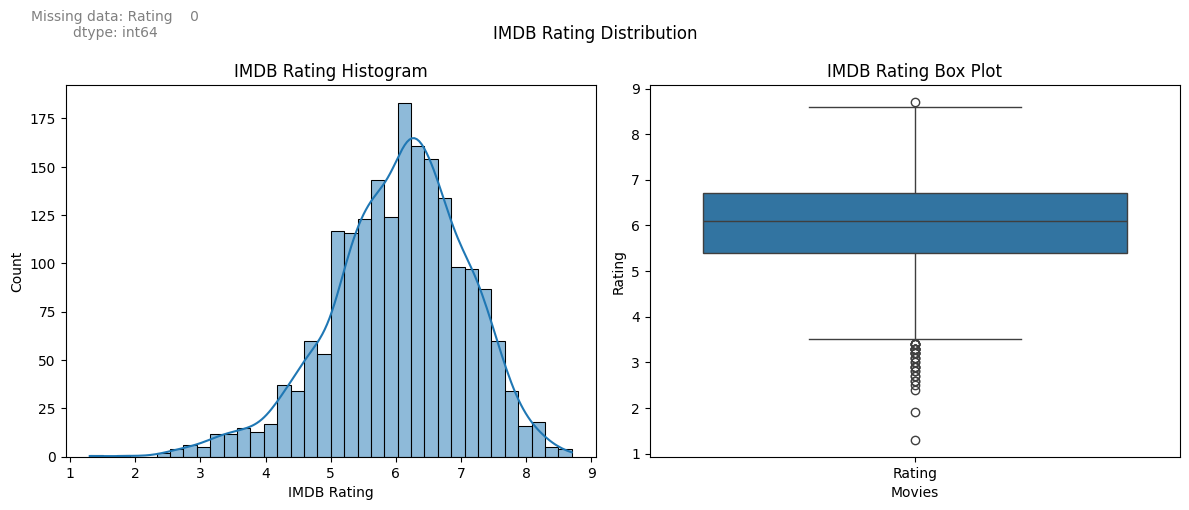

In [13]:
show_rating_distribution(y_train)

<div style="text-align: center;">

***Figure 2:*** *Distribution of IMDb Rating*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 2 illustrates the distribution of IMDb ratings, which appears approximately normal but exhibits a slight left skew. While some outliers are present, all values fall within the valid IMDb rating range, providing no strong justification to treat them as erroneous. Having assessed the target variable, the analysis proceeds to the feature variables.

Beginning with the budget, its distribution is visualized using the same exploratory tools described previously.

In [14]:
x_train['Budget'].describe() 

count    9.350000e+02
mean     5.182127e+07
std      6.404353e+07
min      3.000000e+01
25%      1.000000e+07
50%      2.700000e+07
75%      7.000000e+07
max      5.330000e+08
Name: Budget, dtype: float64

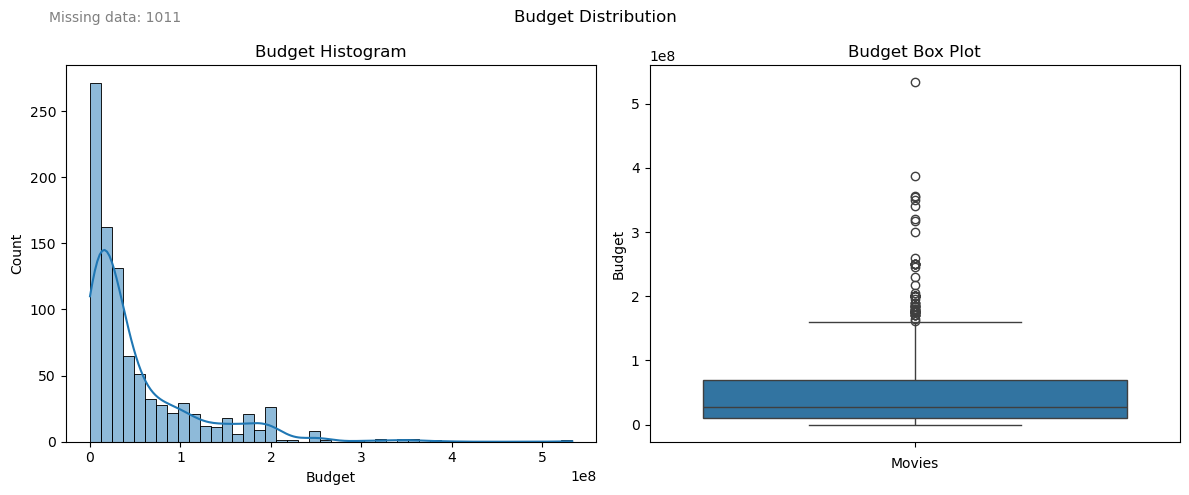

In [ ]:
show_budget_hist(x_train['Budget'])

<div style="text-align: center;">

***Figure 3:*** *Distribution of Budget*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 3 shows that the budget distribution is highly skewed, primarily due to a small number of movies with exceptionally large budgets acting as outliers. These outliers warrant further investigation to determine whether they represent valid data or potential errors. Additionally, it is important to note that the budget variable contains over 1,300 missing values. Another notable observation is that approximately 50% of the films have budgets concentrated within a relatively narrow range between $9,000,000 and $24,000,000.

In [ ]:
# Calculate quartiles and IQR
Q1 = x_train['Budget'].quantile(0.25)
Q3 = x_train['Budget'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_iqr = x_train[(x_train['Budget'] < lower_bound) | (x_train['Budget'] > upper_bound)]
outliers_iqr.sort_values(by=['Budget']).tail(10)

Title  Year       Budget  \
1631                               1. The Lion King  2019  260000000.0   
1287                     3. Solo: A Star Wars Story  2018  300000000.0   
1164     3. Star Wars: Episode VIII - The Last Jedi  2017  317000000.0   
1260                      1. Avengers: Infinity War  2018  321000000.0   
2768                                      2. Fast X  2023  340000000.0   
2643                    2. Avatar: The Way of Water  2022  350000000.0   
2770                          4. The Little Mermaid  2023  355100000.0   
1557                           1. Avengers: Endgame  2019  356000000.0   
2772       6. Indiana Jones and the Dial of Destiny  2023  387200000.0   
573   3. Star Wars: Episode VII - The Force Awakens  2015  533000000.0   

      MPA Rating  Runtime in Minutes  aaa  aaron  abandon  abandoned  \
1631         2.0                 118  0.0    0.0      0.0        0.0   
1287         3.0                 135  0.0    0.0      0.0        0.0   
1164         3.0                 152  0.0    0.0      0.0        0.0   
1260         3.0                 149  0.0    0.0      0.0        0.0   
2768         3.0                 141  0.0    0.0      0.0        0.0   
2643         3.0                 192  0.0    0.0      0.0        0.0   
2770         2.0                 135  0.0    0.0      0.0        0.0   
1557         3.0                 181  0.0    0.0      0.0        0.0   
2772         3.0                 154  0.0    0.0      0.0        0.0   
573          3.0                 138  0.0    0.0      0.0        0.0   

      abandoning  ...  history  horror  music  musical  mystery  romance  \
1631         0.0  ...        0       0      0        0        0        0   
1287         0.0  ...        0       0      0        0        0        0   
1164         0.0  ...        0       0      0        0        0        0   
1260         0.0  ...        0       0      0        0        0        0   
2768         0.0  ...        0       0      0        0        1        0   
2643         0.0  ...        0       0      0        0        0        0   
2770         0.0  ...        0       0      0        1        0        0   
1557         0.0  ...        0       0      0        0        0        0   
2772         0.0  ...        0       0      0        0        0        0   
573          0.0  ...        0       0      0        0        0        0   

      sci-fi  sport  thriller  war  
1631       0      0         0    0  
1287       0      0         0    0  
1164       0      0         0    0  
1260       0      0         0    0  
2768       0      0         0    0  
2643       0      0         0    0  
2770       0      0         0    0  
1557       0      0         0    0  
2772       0      0         0    0  
573        0      0         0    0  

[10 rows x 12621 columns]

In [ ]:
x_train.loc[2770, 'Budget'] = 40_000_000
x_train.loc[573, 'Budget'] = 245_000_000
x_train.loc[669, 'Budget'] = 30_000_000

<div style="border: 2px solid black; padding: 15px 20px; text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto; line-height: 1.6;">
  After cross-referencing with the official IMDb pages and other reliable sources, several budget entries were identified as erroneous and subsequently corrected. Notably, the actual budgets for the following films are:

  <ul style="margin-top: 10px; margin-bottom: 15px; padding-left: 40px; text-align: justify; list-style-position: outside;">
    <li style="padding-left: 10px; margin-bottom: 8px;">
      The Little Mermaid: $40,000,000
    </li>
    <li style="padding-left: 10px; margin-bottom: 8px;">
      Star Wars: Episode VII – The Force Awakens: $245,000,000
    </li>
    <li style="padding-left: 10px; margin-bottom: 8px;">
      Pee-wee’s Big Holiday: $30,000,000
    </li>
  </ul>

  A similar verification process was conducted on the test dataset, where no discrepancies were found. With the budget data validated and cleaned, the analysis proceeds to the next feature: the MPA Rating.
</div>


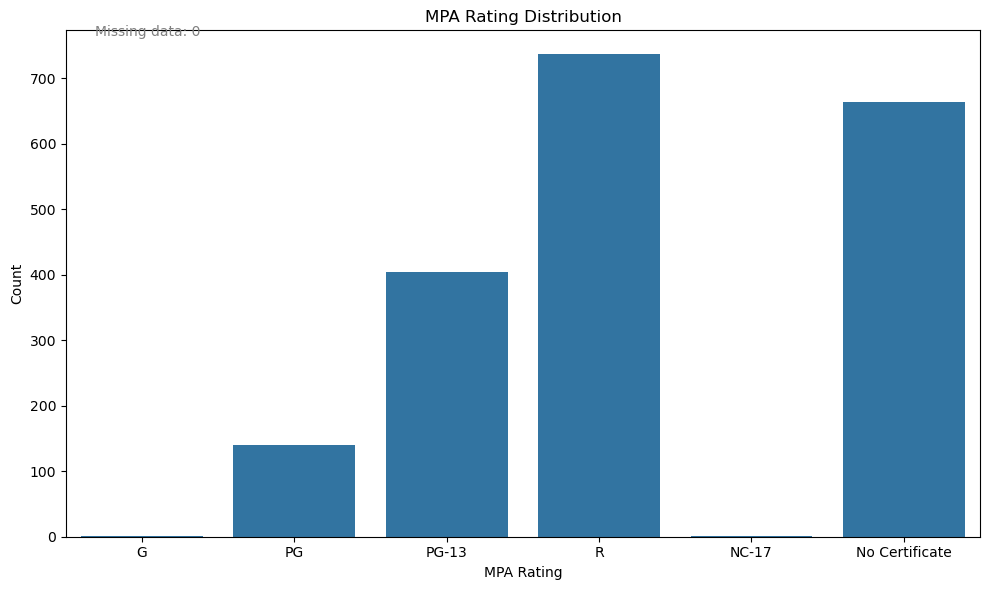

In [ ]:
show_mpa_hist(x_train['MPA Rating'])

<div style="text-align: center;">

***Figure 4:*** *Distribution of MPA Rating*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 4 shows an interesting pattern that emerges in the distribution of MPA Ratings: more inclusive ratings tend to encompass a larger number of films, with the notable exception of the NC-17 category. This exception aligns with industry realities, as many theaters refuse to screen films classified under NC-17, limiting their prevalence <a href="https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism">[b]</a>.

The analysis now proceeds to examine the Runtime Distribution.

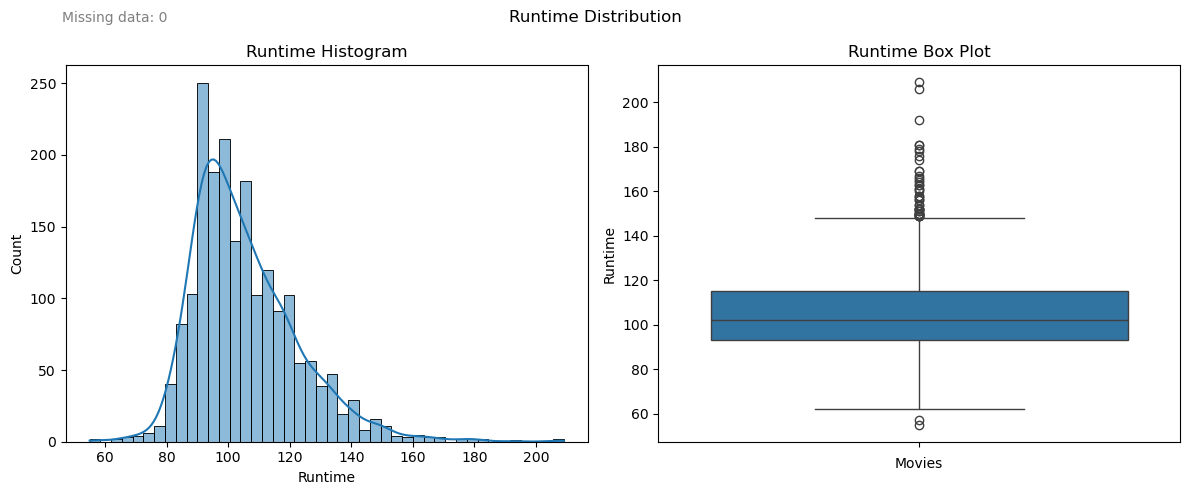

In [ ]:
show_runtime_distribution(x_train['Runtime in Minutes'])

<div style="text-align: center;">

***Figure 5:*** *Distribution of Runtime*

</div>

In [ ]:
# Calculate quartiles and IQR
Q1 = x_train['Runtime in Minutes'].quantile(0.25)
Q3 = x_train['Runtime in Minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_iqr = x_train[(x_train['Runtime in Minutes'] < lower_bound) | (x_train['Runtime in Minutes'] > upper_bound)]
outliers_iqr.sort_values(by=['Runtime in Minutes']).tail(1)

Title  Year       Budget  MPA Rating  Runtime in Minutes  aaa  \
1681  2. The Irishman  2019  159000000.0         4.0                 209  0.0   

      aaron  abandon  abandoned  abandoning  ...  history  horror  music  \
1681    0.0      0.0        0.0         0.0  ...        1       0      0   

      musical  mystery  romance  sci-fi  sport  thriller  war  
1681        0        0        0       0      0         0    0  

[1 rows x 12621 columns]

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The runtime distribution exhibits a slight skew as seen in Figure 5, with several notable outliers having exceptionally long durations. These extended runtimes are plausible, as exemplified by Zack Snyder’s Justice League, which is famously over four hours in length. Verification of such data points confirms their validity rather than error.

With the runtime analysis complete, the focus now shifts to processing the comma-delimited categorical features.

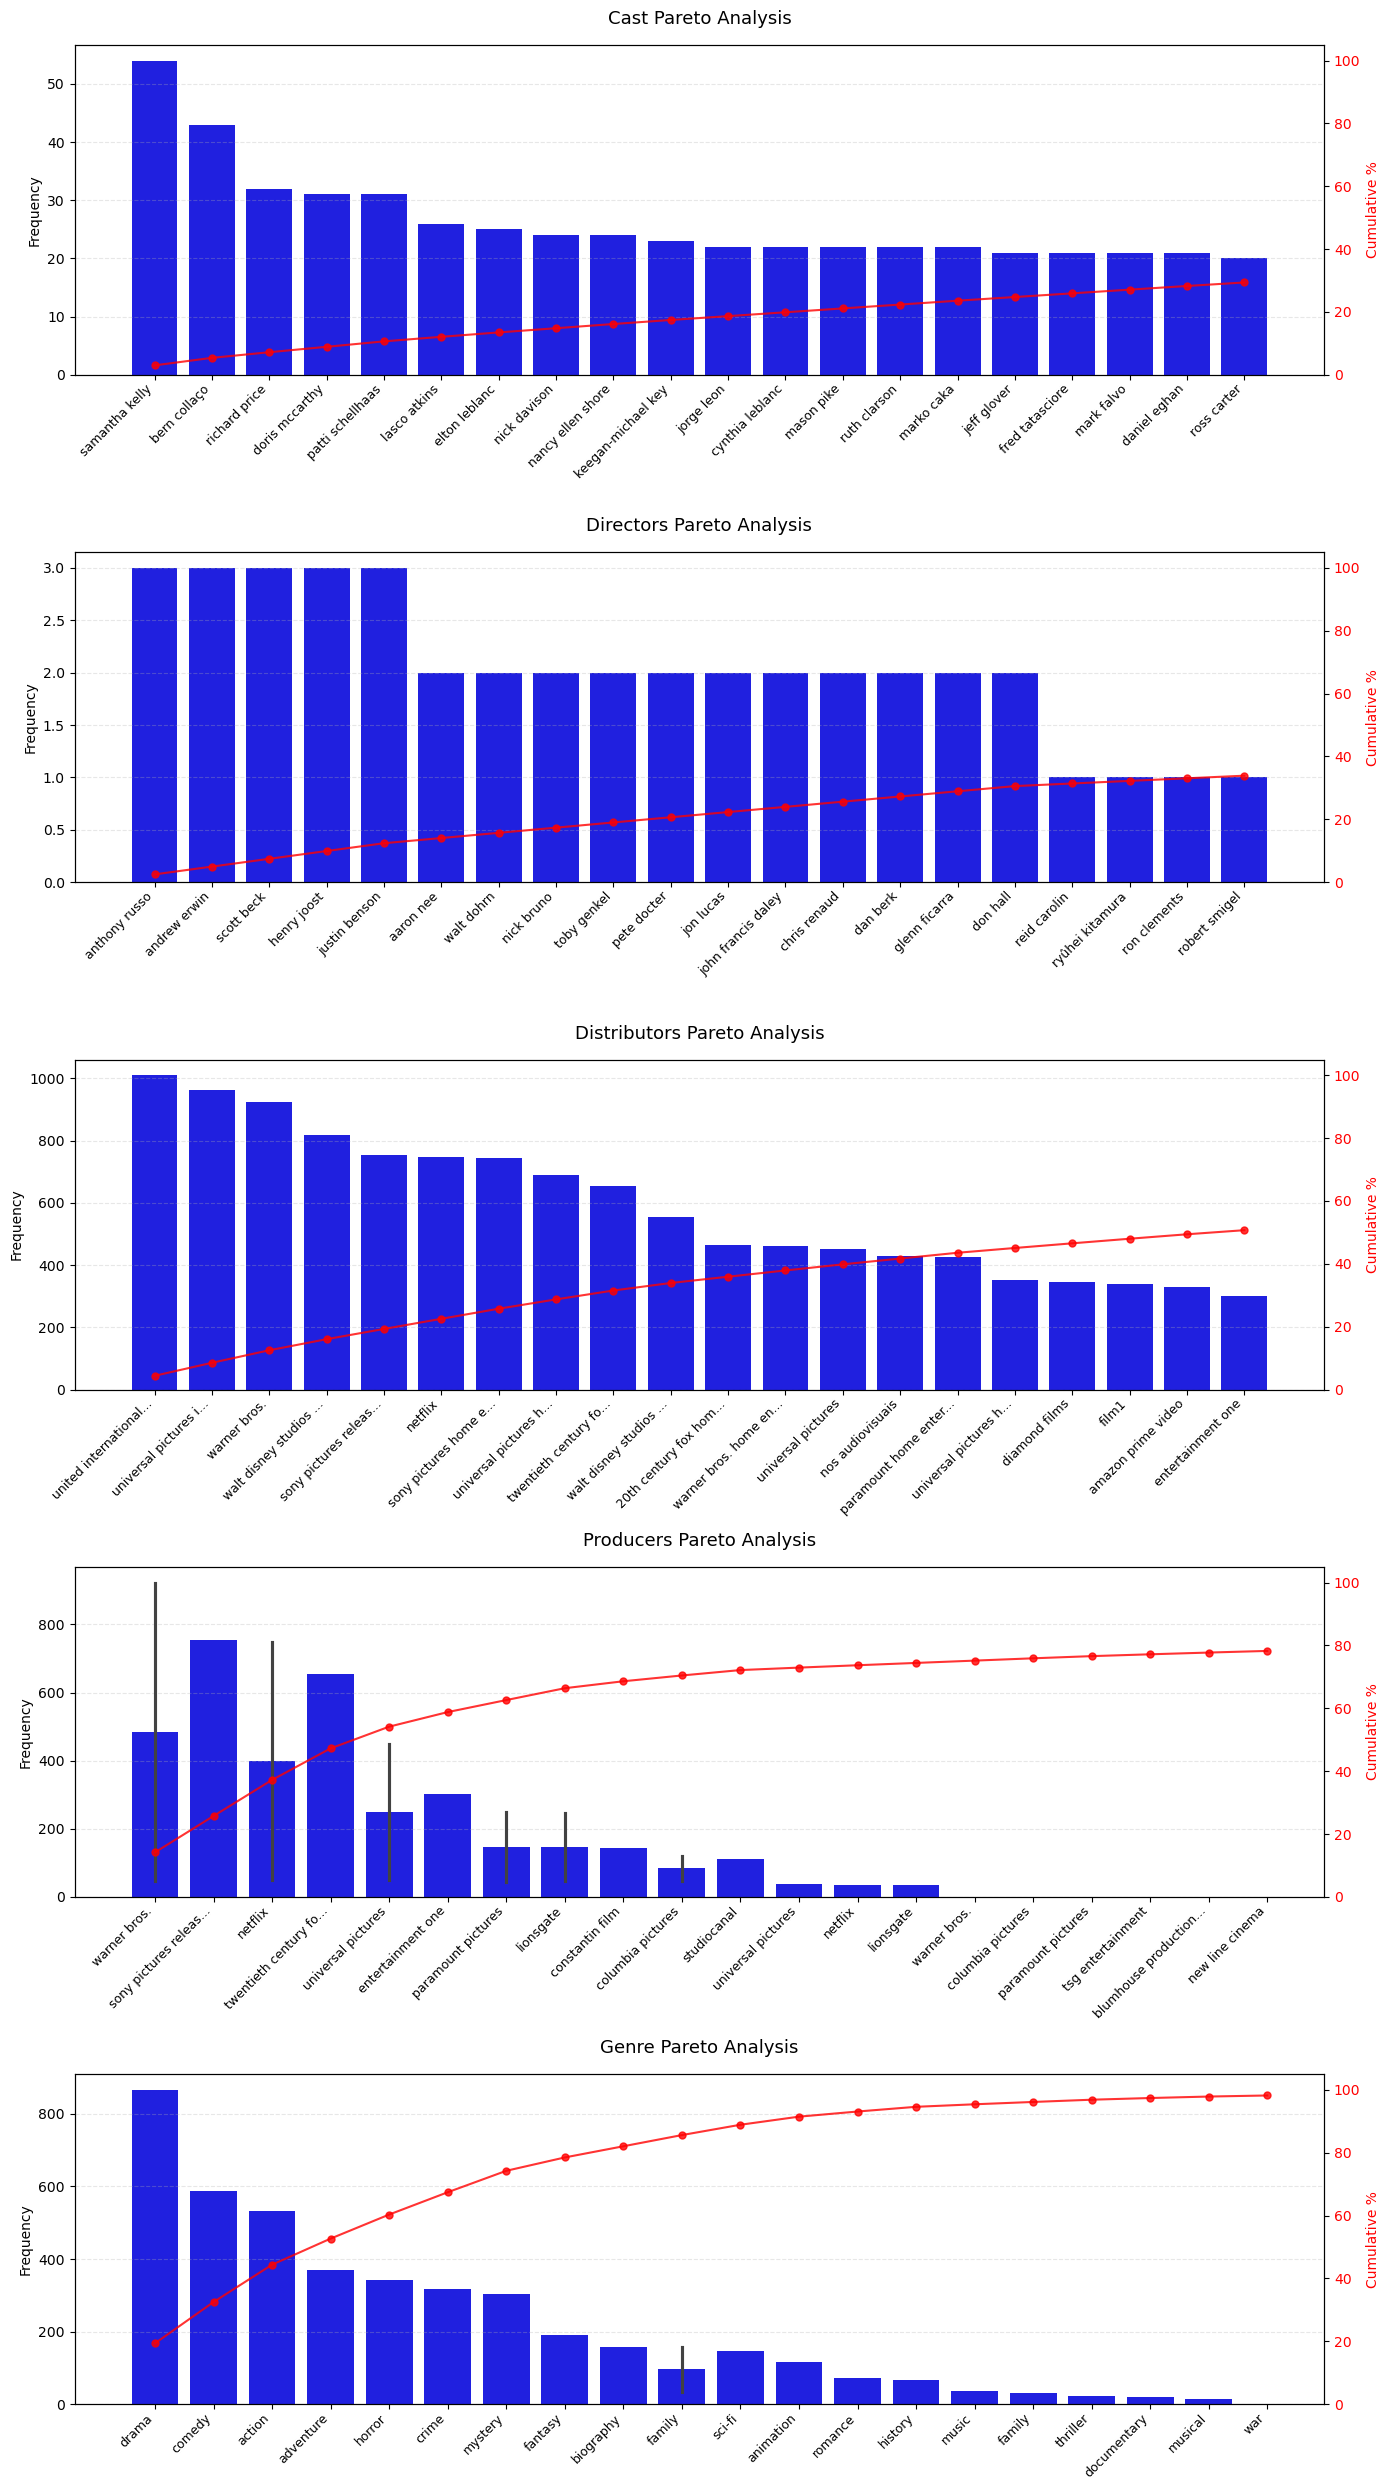

In [ ]:
plot_pareto_charts(x_train, feature_dict)

<div style="text-align: center;">

***Figure 6:*** *Pareto Charts of the Categorical Figures*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 6 reveals the distribution patterns of the categorical features. The cast and directors exhibit considerable diversity, with the top 20 individuals accounting for just over 30% of total appearances. In contrast, the distributions for distributors and producers are markedly more concentrated: the top 20 distributors represent approximately 50% of all distribution instances, while the top 20 production companies are responsible for 80% of the films.

Next, attention turns to the plot summary feature. To illustrate the relative importance of individual tokens, a word cloud visualization is used, where the size of each word corresponds to its average TF-IDF value.

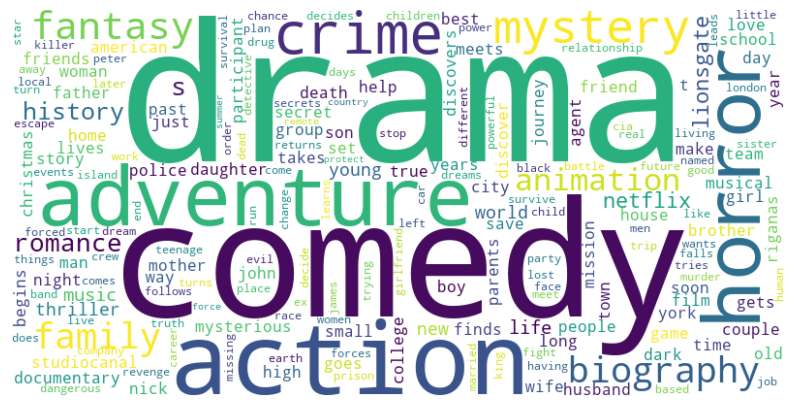

In [ ]:
show_token_distribution(x_train[feature_dict['tokens']])

<div style="text-align: center;">

***Figure 7:*** *Word Cloud of the Plot Feature*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 7 clearly highlights the prominence of genre-related terms within the plot summaries, with words such as “drama,” “comedy,” and “action” appearing frequently. Since genre is already represented as a separate feature in the dataset, this overlap suggests that additional preprocessing may be necessary to reduce redundancy and improve model performance.

---

### Data Transformations
Building on insights from the exploratory data analysis, we proceed to transform the dataset in preparation for model training. The first transformation involves converting the continuous Ratings feature into a categorical variable. This recasts the problem as a classification task, simplifying interpretation and aligning with practical decision-making needs. Using the median rating as a threshold, films are classified into two balanced categories: “good” (ratings above the median) and “bad” (ratings below the median).

In [1]:
%run eda2.ipynb

Defaulting to user installation because normal site-packages is not writeable
Successfully Imported


In [ ]:
# Calculate dynamic bin edges
min_val = y_train['Rating'].min()
max_val = y_train['Rating'].max()
q1 = y_train['Rating'].quantile(0.25)
q2 = y_train['Rating'].quantile(0.50)
q3 = y_train['Rating'].quantile(0.75)

# Create bins with these values
bins = [min_val, q2, max_val]

# Use pd.cut to assign categorical labels based on the computed bins
y_train['Rating'] = pd.cut(
    y_train['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

y_val['Rating'] = pd.cut(
    y_val['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

y_test['Rating'] = pd.cut(
    y_test['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

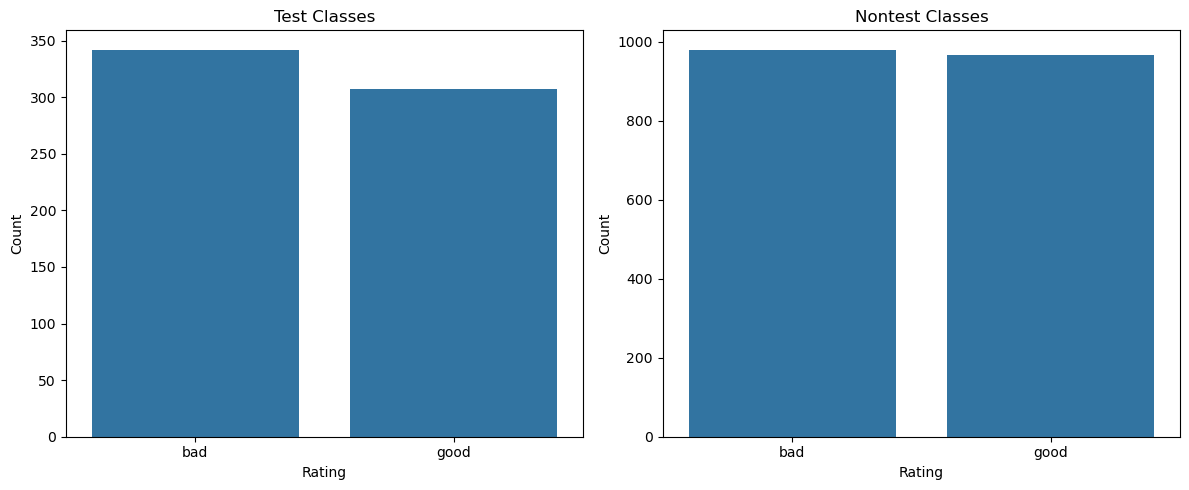

In [ ]:
plot_two_countplots(y_test, y_train)

<div style="text-align: center;">

***Figure 8:*** *Visualization of Rating Classes*

</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 8 reveals that the chosen approach results in two relatively balanced classes, facilitating more effective model training and evaluation.

Turning to the predictor variables, the high dimensionality of the sparse TF-IDF vectors is addressed through Principal Component Analysis (PCA), which reduces dimensionality while preserving the most informative features.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
tokens = feature_dict['tokens']

# Initialize PCA with the variance threshold
pca = PCA()

# Fit PCA on the scaled non-test data
pca.fit(x_train[tokens])

# Transform both non-test and test data using the fitted PCA
x_train_pca = pca.transform(x_train[tokens])
x_val_pca = pca.transform(x_val[tokens])
x_test_pca = pca.transform(x_test[tokens])

# Generate names for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_train_pca.shape[1])]

# Replace original features with PCA components in the DataFrames
x_train_copy = x_train.copy()


x_train = pd.concat([
    x_train.drop(columns=tokens),
    pd.DataFrame(x_train_pca, columns=pca_columns, index=x_train.index)
], axis=1)

x_val = pd.concat([
    x_val.drop(columns=tokens),
    pd.DataFrame(x_val_pca, columns=pca_columns, index=x_val.index)
], axis=1)

x_test = pd.concat([
    x_test.drop(columns=tokens),
    pd.DataFrame(x_test_pca, columns=pca_columns, index=x_test.index)
], axis=1)

feature_dict['PCS'] = pca_columns

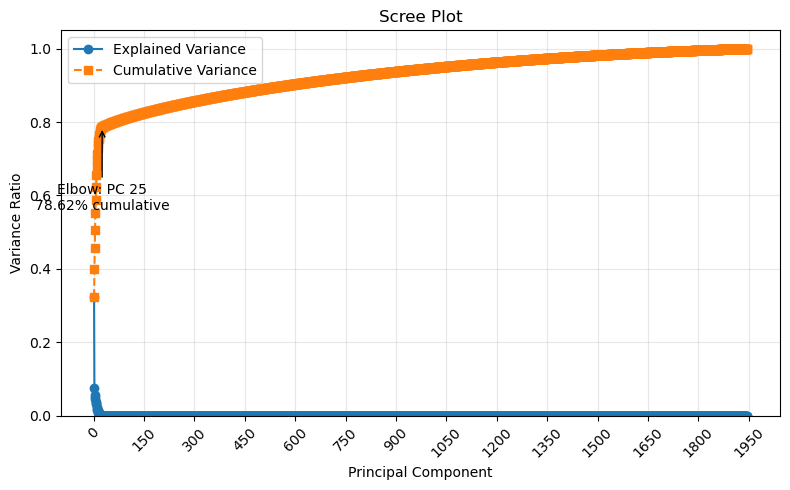

(25, 0.7861954731985834)

In [ ]:
plot_scree(pca)

<div style="text-align: center;">

***Figure 9:*** *Scree Plot of the Principal Components*

</div>

In [ ]:
x_train.drop(x_train[feature_dict['PCS']].columns[25:], axis=1, inplace=True)
x_val.drop(x_val[feature_dict['PCS']].columns[25:], axis=1, inplace=True)
x_test.drop(x_test[feature_dict['PCS']].columns[25:], axis=1, inplace=True)

In [ ]:
feature_dict['PCS'] = pca_columns[:25]

In [ ]:
x_train.head(2)

Title  Year    Budget  MPA Rating  Runtime in Minutes  \
2186    20. The Retreat  2021       NaN         6.0                  82   
902   10. A Ghost Story  2017  150000.0         4.0                  92   

      adam sandler  arnold montey  attila g. kerekes  bern collaço  \
2186             0              0                  0             0   
902              0              0                  0             0   

      bernardo santos  ...      PC16      PC17      PC18      PC19      PC20  \
2186                0  ...  0.005585 -0.003183 -0.025976 -0.006093 -0.001766   
902                 0  ... -0.061466  0.044401 -0.012264 -0.072072  0.013660   

          PC21      PC22      PC23      PC24      PC25  
2186 -0.027307 -0.000221 -0.009084  0.001949 -0.070208  
902  -0.008280 -0.038293  0.004605 -0.004730  0.039570  

[2 rows x 424 columns]

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The scree plot as seen in Figure 9 shows that the first 25 principal components capture approximately 78% of the variance in the original plot summary space, allowing us to significantly reduce dimensionality by discarding the remaining components without substantial loss of information.

Next, we address the budget feature. Although the data has been cleaned, missing values remain a concern. Additionally, given the dataset spans multiple years, it is necessary to adjust budgets for inflation to ensure comparability over time. Leveraging World Bank inflation data, with 2015 as the base year (consistent with the U.S. inflation index), we calculate the inflation-adjusted budget using the formula:

$$
\text{Real Price}_t = \text{Nominal Price}_t \times \frac{\text{Index}_{2015}}{\text{Index}_t}
$$

Since inflation data for 2024 is not yet available, we approximate the 2024 deflator using the 2023 value, assuming minimal price changes over this short period. Dropping this year was also considered. However, this would have corresponded to a loss of 10% of the dataset——half of the size of the test set.

In [ ]:
deflators = pd.read_csv('deflators.csv')
deflators = deflators.drop(
    columns=[
        "Unnamed: 0", "Country Name", "Country Code",
        "Indicator Name", "Indicator Code",
        "Unnamed: 69"
    ]
)

# Reshape deflators to have years as rows (assuming deflators has one row)
deflators_series = deflators.T.squeeze()
deflators_series.index = deflators_series.index.astype(int)  # Convert index to integer for matching
deflators_series[2024] = deflators_series[2023]

# Calculate adjusted budget
adjusted = x_train["Budget"] * deflators_series[2015] / x_train["Year"].map(deflators_series)
x_train["Budget"] =  adjusted

adjusted = x_val["Budget"] * deflators_series[2015] / x_val["Year"].map(deflators_series)
x_val["Budget"] =  adjusted

adjusted = x_test["Budget"] * deflators_series[2015] / x_test["Year"].map(deflators_series)
x_test["Budget"] =  adjusted

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Applying these adjustments yields the following distribution.

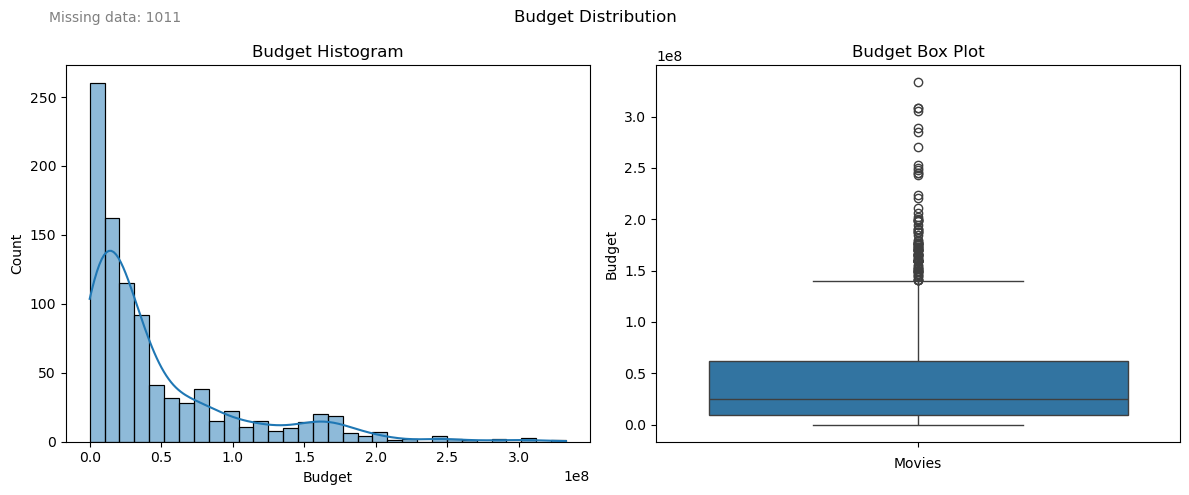

In [ ]:
show_budget_hist(x_train['Budget'])

<div style="text-align: center;">

***Figure 10:*** *Distribution of Budget Post-Adjustment*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Despite the inflation adjustment, the budget data remains skewed as expressed in Figure 10. While imputing missing values with the median is an option, doing so could disproportionately affect the distribution if standard scaling is applied later. Instead, we align the budget feature with the target variable by discretizing it into ordinal categories. Using the quartiles of the non-imputed budget data, we define budget levels as bins. Missing values are then imputed using the median within these bins, and the budget feature is transformed into an ordinal variable through a corresponding mapping.

In [ ]:
# Calculate dynamic bin edges
min_val = x_train['Budget'].min()
max_val = np.inf
q1 = x_train['Budget'].quantile(0.25)
q2 = x_train['Budget'].quantile(0.50)
q3 = x_train['Budget'].quantile(0.75)

# Create bins with these values
bins = [min_val, q1, q2, q3, max_val]
median = x_train['Budget'].median()
x_train['Budget'] = x_train['Budget'].fillna(median)
x_val['Budget'] = x_val['Budget'].fillna(median)
x_test['Budget'] = x_test['Budget'].fillna(median)

# Use pd.cut to assign categorical labels based on the computed bins
x_train['Budget'] = pd.cut(
    x_train['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_val['Budget'] = pd.cut(
    x_val['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_test['Budget'] = pd.cut(
    x_test['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_train

Title  Year Budget  MPA Rating  Runtime in Minutes  \
2186           20. The Retreat  2021      2         6.0                  82   
902          10. A Ghost Story  2017      1         4.0                  92   
2086                 19. Music  2021      2         3.0                 107   
285            14. The Pyramid  2014      1         4.0                  89   
53                     4. Noah  2014      4         3.0                 138   
...                        ...   ...    ...         ...                 ...   
1491            10. Late Night  2019      1         4.0                 102   
817   22. The Belko Experiment  2016      1         4.0                  89   
1911  15. One Night in Bangkok  2020      1         4.0                 105   
1040             24. OtherLife  2017      2         6.0                  96   
643             23. Dad's Army  2016      2         6.0                 100   

      adam sandler  arnold montey  attila g. kerekes  bern collaço  \
2186             0              0                  0             0   
902              0              0                  0             0   
2086             0              0                  0             0   
285              0              0                  0             0   
53               0              0                  0             0   
...            ...            ...                ...           ...   
1491             0              0                  0             0   
817              0              0                  0             0   
1911             0              0                  0             0   
1040             0              0                  0             0   
643              0              0                  0             0   

      bernardo santos  ...      PC16      PC17      PC18      PC19      PC20  \
2186                0  ...  0.005585 -0.003183 -0.025976 -0.006093 -0.001766   
902                 0  ... -0.061466  0.044401 -0.012264 -0.072072  0.013660   
2086                0  ...  0.018525  0.007619 -0.006638  0.153705  0.013008   
285                 0  ... -0.005316  0.012150 -0.010934 -0.047073  0.030079   
53                  0  ... -0.003092 -0.050917 -0.017906  0.021064 -0.034471   
...               ...  ...       ...       ...       ...       ...       ...   
1491                0  ... -0.052499 -0.034622  0.004602 -0.023304  0.008923   
817                 0  ...  0.010205 -0.000470 -0.028043 -0.010175 -0.003993   
1911                0  ... -0.010625  0.019685 -0.151166 -0.028898 -0.072880   
1040                0  ... -0.053541 -0.022289 -0.020460 -0.010332 -0.019478   
643                 0  ... -0.022376 -0.018576  0.001817 -0.025243  0.030343   

          PC21      PC22      PC23      PC24      PC25  
2186 -0.027307 -0.000221 -0.009084  0.001949 -0.070208  
902  -0.008280 -0.038293  0.004605 -0.004730  0.039570  
2086 -0.030515  0.998214  0.012668 -0.143966  0.082473  
285  -0.010149  0.001484  0.016110 -0.143448 -0.035637  
53   -0.029295  0.003846  0.006956 -0.006427  0.041106  
...        ...       ...       ...       ...       ...  
1491 -0.026602 -0.013801 -0.001325 -0.008564 -0.000417  
817  -0.023002  0.003714 -0.005998 -0.002640 -0.037028  
1911  0.022189  0.006351 -0.026237  0.003290 -0.025485  
1040 -0.006118 -0.016087 -0.000303 -0.015592 -0.010843  
643  -0.014297 -0.003284  0.001872 -0.002401 -0.082695  

[1946 rows x 424 columns]

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Finally, we scale the runtime feature, measured in minutes, as its scale differs substantially from the other variables. Given the right-skewed distribution of runtime, a log transformation is applied prior to scaling to normalize its distribution and improve model performance.

In [ ]:
x_train['Runtime in Minutes'] = np.log(x_train['Runtime in Minutes'])
x_val['Runtime in Minutes'] = np.log(x_val['Runtime in Minutes'])
x_test['Runtime in Minutes'] = np.log(x_test['Runtime in Minutes'])

In [ ]:
from sklearn.preprocessing import StandardScaler
#Scaler, use either Standard or Min Max
#Cuztomizable
scaler = StandardScaler()

#Scale the data using the scaler
#We make sure not to use the test set
#to avoid data leakage
scaler = scaler.fit(x_train[['Runtime in Minutes']])
x_train[['Runtime in Minutes']] = scaler.transform(x_train[['Runtime in Minutes']])
x_val[['Runtime in Minutes']] = scaler.transform(x_val[['Runtime in Minutes']])
x_test[['Runtime in Minutes']] = scaler.transform(x_test[['Runtime in Minutes']])

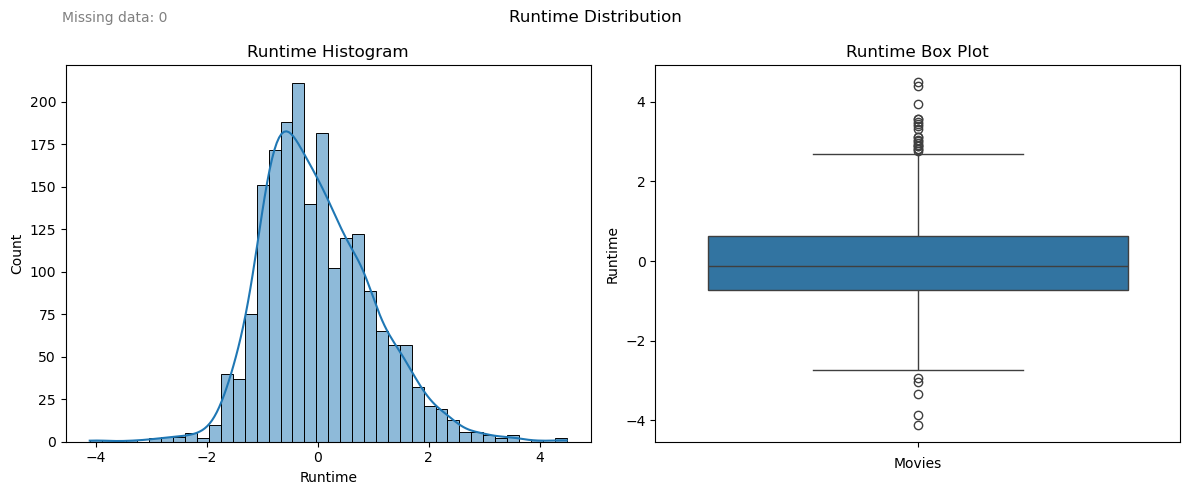

In [ ]:
show_runtime_distribution(x_train['Runtime in Minutes'])

<div style="text-align: center;">

***Figure 11:*** *Distribution of Runtime Post-Normalization*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 11 shows log transformation successfully normalized the runtime feature, bringing its scale more in line with the other variables. To finalize the preprocessing, we remove non-essential features such as Title and Year, which are unlikely to contribute meaningfully to the predictive model.


In [ ]:
x_train = x_train.drop(columns=['Title', 'Year'])
x_val = x_val.drop(columns=['Title', 'Year'])
x_test = x_test.drop(columns=['Title', 'Year'])

In [ ]:
x_train.tail(2)

Budget  MPA Rating  Runtime in Minutes  adam sandler  arnold montey  \
1040      2         6.0           -0.523702             0              0   
643       2         6.0           -0.260727             0              0   

      attila g. kerekes  bern collaço  bernardo santos  bill murray  \
1040                  0             0                0            0   
643                   0             0                0            0   

      billy slaughter  ...      PC16      PC17      PC18      PC19      PC20  \
1040                0  ... -0.053541 -0.022289 -0.020460 -0.010332 -0.019478   
643                 0  ... -0.022376 -0.018576  0.001817 -0.025243  0.030343   

          PC21      PC22      PC23      PC24      PC25  
1040 -0.006118 -0.016087 -0.000303 -0.015592 -0.010843  
643  -0.014297 -0.003284  0.001872 -0.002401 -0.082695  

[2 rows x 422 columns]

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Model Training
We begin by splitting the non-test dataset into training and validation sets. The training set is used to fit the model’s parameters, while the validation set serves the purpose of hyperparameter tuning.

In [ ]:
Classifiers = {}
Hyperparams = {}

# Ensure target values are properly formatted
y_train = y_train[target].values.ravel()
y_test = y_test[target].values.ravel()
y_val = y_val[target].values.ravel()

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

K-Nearest Neighbors **(KNN)** classifies data points based on the labels of their k closest neighbors in the feature space. To optimize performance, we tune the hyperparameter k by iterating through a range of possible values. We implement early stopping during this search, halting the process if the validation accuracy does not improve for 10 consecutive iterations.

In [ ]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 10


#Recording Variables
scores = [0]
k_searched = 0
current_patience = patience

for k in range(1,len(x_train)):
    # Instantiate the model
    reg = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    if current_patience <= 0:
        break

    scores.append(score)
    k_searched += 1

best_k = np.argmax(scores)
print(f"{best_k=}")

# KNN Regressor
KNNclass = sklearn.neighbors.KNeighborsClassifier(n_neighbors=best_k)
KNNclass.fit(x_train, y_train)
Classifiers["KNN Classifier"] = KNNclass
Hyperparams["KNN Classifier"] = f"{best_k=}"

best_k=21


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The next two models are linear classifiers. We apply a similar hyperparameter tuning approach as with KNN, but instead of a fixed range, we perform a logarithmic search that extends unbounded in one direction to efficiently explore a wide spectrum of parameter values.

In [ ]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 5
scores = [0]
c_searched = [0]

current_patience = patience
c = 2 ** (-5)

while current_patience > 0:
    # Instantiate the model
    reg = sklearn.linear_model.LogisticRegression(C=c, max_iter=100000)
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    scores.append(score)
    c_searched.append(c)

    c *= 2
    

#calculate alpha based on index of best score
best_c = 2.0 ** (np.argmax(scores)-6) 
print(f"{best_c=}")

# KNN Regressor
Ridgereg = sklearn.linear_model.LogisticRegression(C=best_c)
Ridgereg.fit(x_train, y_train)
Classifiers["Logistic Regression (L2)"] = Ridgereg
Hyperparams["Logistic Regression (L2)"] = f"{best_c=}"

best_c=0.03125


In [ ]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 10

scores = [0]
c_searched = [0]

current_patience = patience
c = 2 ** (-5)
while current_patience > 0:
    # Instantiate the model
    reg = sklearn.svm.LinearSVC(C=c, penalty="l2")
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    scores.append(score)
    c_searched.append(c)

    c *= 2

#calculate alpha based on index of best score
best_c = 2.0 ** (np.argmax(scores)-6) 
print(f"{best_c=}")

# KNN Regressor
Ridgereg = sklearn.svm.LinearSVC(C=best_c, penalty="l2")
Ridgereg.fit(x_train, y_train)
Classifiers["SVM (L2)"] = Ridgereg
Hyperparams["SVM (L2)"] = f"{best_c=}"

best_c=0.0625


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Next, we consider tree-based ensemble methods, which combine multiple decision trees to improve predictive performance and robustness.

In [ ]:
rf = sklearn.ensemble.RandomForestClassifier(random_state=42, n_estimators=1000, max_depth = 3)
rf.fit(x_train, y_train)

Classifiers["RF"] = rf
Hyperparams["RF"] = 'None'

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Model Evaluation
We begin by summarizing the accuracy scores of each model on the validation set, highlighting those that achieve the highest validation accuracy for further consideration.

In [ ]:
model_performances = pd.DataFrame(
    columns=[
        "Classifier", "Train Score", "Test Score",
        "Validation Score", "Hyperparams"
    ]
)


for classifier in Classifiers:
    train_score = f"{Classifiers[classifier].score(x_train, y_train):.2%}"
    test_score = f"{Classifiers[classifier].score(x_test, y_test): .2%}"
    val_score = f"{Classifiers[classifier].score(x_val, y_val): .2%}"
    hp = Hyperparams.get(classifier)
    model_performances.loc[len(model_performances)] = [classifier, train_score, test_score, val_score, hp]

model_performances.sort_values(by=["Validation Score"], ascending=False)

Classifier Train Score Test Score Validation Score  \
1  Logistic Regression (L2)      75.69%     71.80%           71.49%   
2                  SVM (L2)      79.34%     70.57%           71.03%   
3                        RF      73.69%     68.57%           70.72%   
0            KNN Classifier      69.68%     65.33%           69.95%   

      Hyperparams  
1  best_c=0.03125  
2   best_c=0.0625  
3             nuh  
0       best_k=21

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Based on the table above, Logistic Regression with L2 regularization achieves the highest validation accuracy among the models tested. However, accuracy alone does not provide a complete picture of model performance. To gain a more comprehensive understanding, we examine additional evaluation metrics.

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

# NEW DataFrame with ONLY validation metrics
val_metrics = pd.DataFrame(columns=[
    "Classifier",
    "Validation Score",  # Accuracy
    "Val F1",           # F1-score
    "Val Recall",       # Recall
    "Val Precision",    # Precision
    "Hyperparams"
])

for classifier in Classifiers:
    # Get predictions for validation set
    y_val_pred = Classifiers[classifier].predict(x_val)

    # Calculate validation metrics
    val_score = f"{Classifiers[classifier].score(x_val, y_val):.2%}"  # Accuracy
    val_f1 = f"{f1_score(y_val, y_val_pred, average='binary', pos_label='good'):.2%}"
    val_recall = f"{recall_score(y_val, y_val_pred, average='binary', pos_label='good'):.2%}"
    val_precision = f"{precision_score(y_val, y_val_pred, average='binary',  pos_label='good'):.2%}"

    hp = Hyperparams.get(classifier)

    val_metrics.loc[len(val_metrics)] = [
        classifier,
        val_score,
        val_f1,
        val_recall,
        val_precision,
        hp
    ]

# Sort by Validation Score (descending)
val_metrics.sort_values(by="Validation Score", ascending=False)

Classifier Validation Score  Val F1 Val Recall Val Precision  \
1  Logistic Regression (L2)           71.49%  68.59%     66.01%        71.38%   
2                  SVM (L2)           71.03%  68.35%     66.34%        70.49%   
3                        RF           70.72%  64.55%     56.54%        75.22%   
0            KNN Classifier           69.95%  64.48%     57.84%        72.84%   

      Hyperparams  
1  best_c=0.03125  
2   best_c=0.0625  
3             nuh  
0       best_k=21

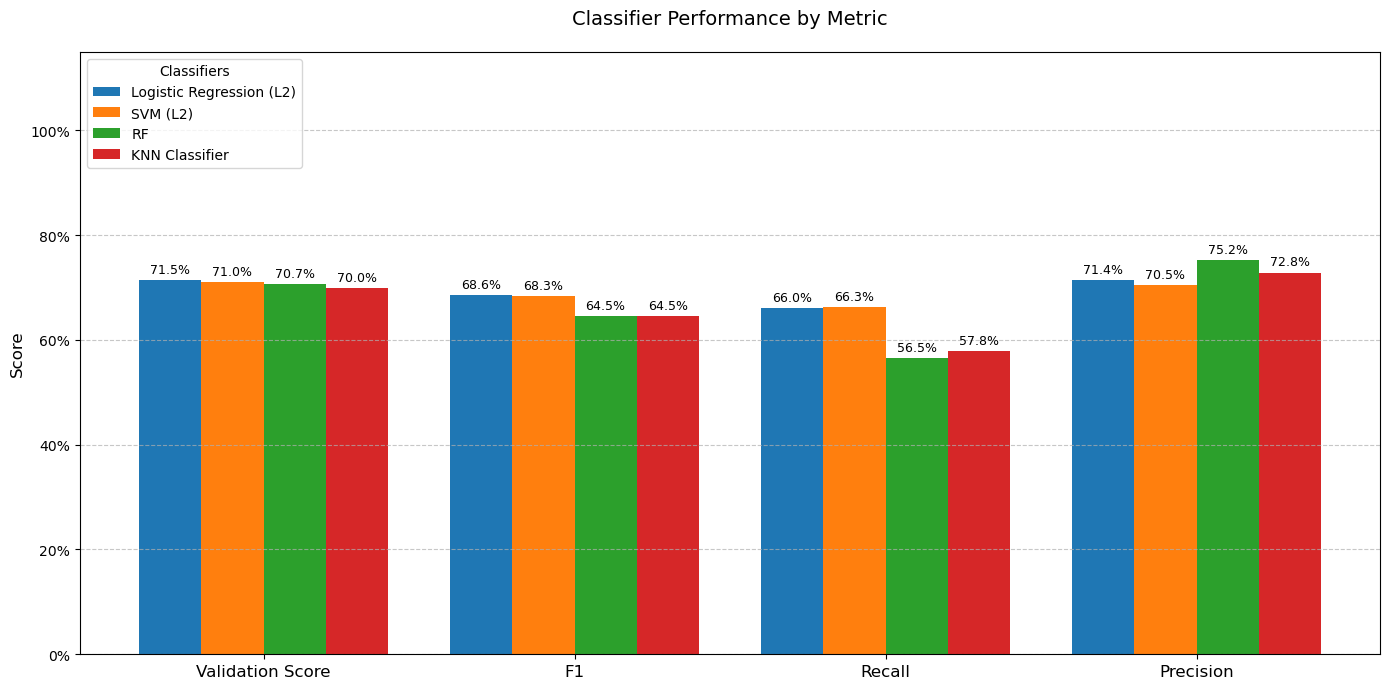

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# --- Data Preparation ---
# Convert percentages to floats and sort by Validation Score
val_metrics_numeric = val_metrics.copy()
for col in ['Validation Score', 'Val F1', 'Val Recall', 'Val Precision']:
    val_metrics_numeric[col] = val_metrics_numeric[col].str.replace('%', '').astype(float) / 100

# Sort classifiers by Validation Score (descending)
val_metrics_numeric = val_metrics_numeric.sort_values('Validation Score', ascending=False)
classifiers = val_metrics_numeric['Classifier'].tolist()

# --- Plot Configuration ---
metrics = ['Validation Score', 'Val F1', 'Val Recall', 'Val Precision']
metric_labels = [m.replace('Val ', '') for m in metrics]
n_metrics = len(metrics)
n_classifiers = len(classifiers)

bar_width = 0.8 / n_classifiers  # Dynamic width to fill cluster space
x = np.arange(n_metrics)  # Metric cluster positions
colors = plt.cm.tab10.colors[:n_classifiers]  # Color palette

fig, ax = plt.subplots(figsize=(14, 7))

# --- Plotting ---
for i, classifier in enumerate(classifiers):
    # Get values for current classifier
    values = val_metrics_numeric.loc[val_metrics_numeric['Classifier'] == classifier, metrics].values[0]
    
    # Calculate bar positions (centered within cluster)
    offset = -0.4 + (i + 0.5) * bar_width
    bars = ax.bar(x + offset, values, bar_width, label=classifier, color=colors[i])
    
    # Annotate each bar with its value
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# --- Formatting ---
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(top=1.15)  # Extra space for annotations
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Classifier Performance by Metric', fontsize=14, pad=20)
ax.legend( loc='upper left', title='Classifiers')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<div style="text-align: center;">

***Figure 12:*** *Model Performance by Metric of Each Classifier*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Based on Figure 12, Logistic Regression with L2 regularization outperforms the other models across all evaluation metrics, with Support Vector Machine (SVM) following closely behind. To better understand how the precision and recall values translate into actual predictions, we examine the confusion matrices for each model. A summary table and corresponding bar graph are provided above to illustrate these results.

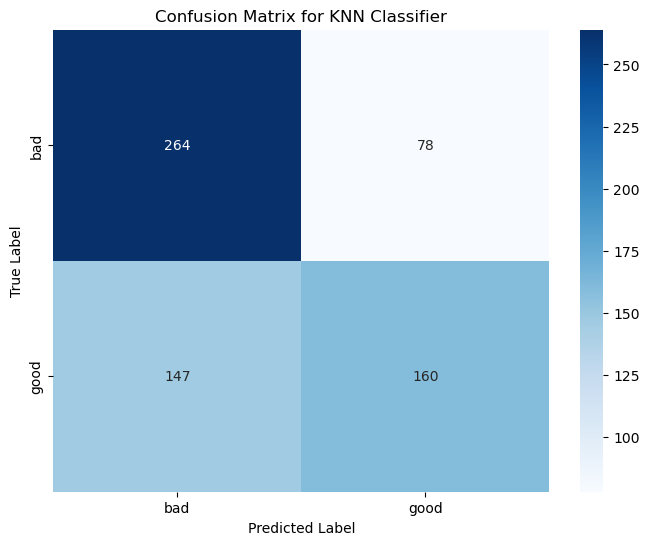

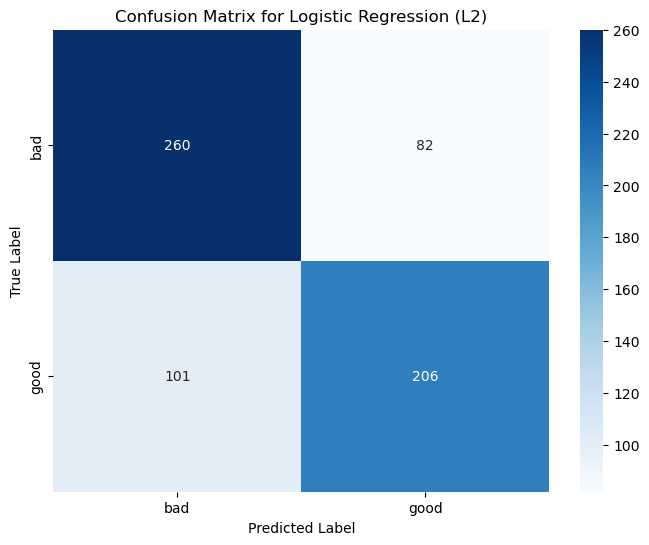

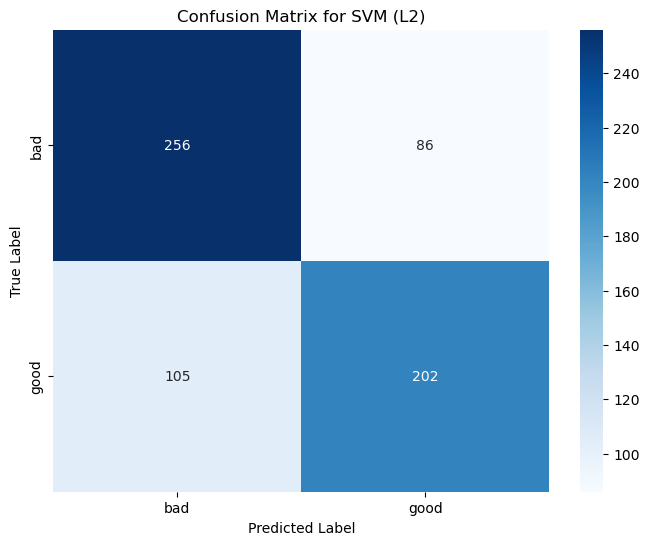

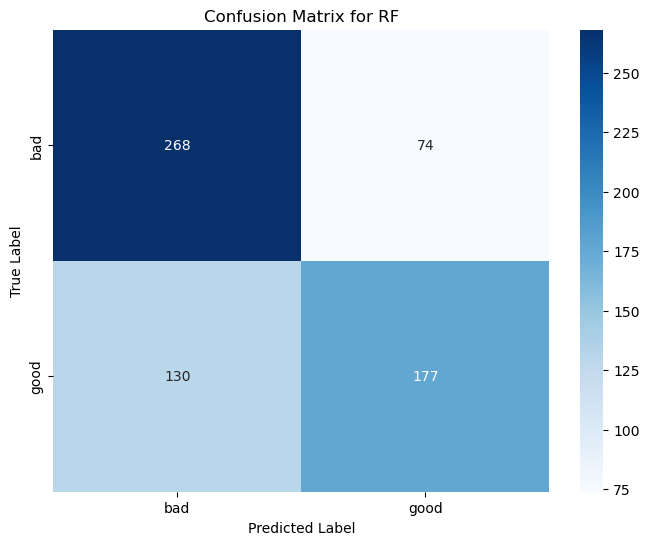

In [ ]:
for classifier in Classifiers:
    model = Classifiers[classifier]
    y_pred = model.predict(x_test)
    
    # Compute the confusion matrix, specifying labels to ensure an n x n matrix
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix using seaborn's heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {classifier}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<div style="text-align: center;">

***Figure 13:*** *Confusion Matrices of Classifiers*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The validation accuracies indicate that Logistic Regression with L2 regularization delivers the best overall performance. This is further confirmed by its confusion matrix in Figure 13, which shows strong classification along the diagonal for both classes. However, there is a slight bias toward predicting the “bad” class, evidenced by a higher number of true good films being misclassified as bad compared to the reverse.

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Select the specific classifier
classifier_name = 'Logistic Regression (L2)'
model = Classifiers[classifier_name]

# Get predictions for TEST set
y_test_pred = model.predict(x_test)

# Calculate metrics (using binary averaging with pos_label='good')
test_score = f"{model.score(x_test, y_test):.2%}"  # Accuracy
test_f1 = f"{f1_score(y_test, y_test_pred, average='binary', pos_label='good'):.2%}"
test_recall = f"{recall_score(y_test, y_test_pred, average='binary', pos_label='good'):.2%}"
test_precision = f"{precision_score(y_test, y_test_pred, average='binary', pos_label='good'):.2%}"

# Create a DataFrame for the results
test_metrics = pd.DataFrame({
    "Classifier": [classifier_name],
    "Test Score (Accuracy)": [test_score],
    "Test F1": [test_f1],
    "Test Recall": [test_recall],
    "Test Precision": [test_precision],
    "Hyperparams": [Hyperparams.get(classifier_name)]
})

test_metrics

Classifier Test Score (Accuracy) Test F1 Test Recall  \
0  Logistic Regression (L2)                71.80%  69.24%      67.10%   

  Test Precision     Hyperparams  
0         71.53%  best_c=0.03125

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Feature Importance
To understand how the model evaluates its input features, we examine the coefficients associated with each feature. Given that our selected model is linear, these coefficients provide a direct indication of feature importance. We begin by visualizing the top 30 features ranked by the magnitude of their coefficients.

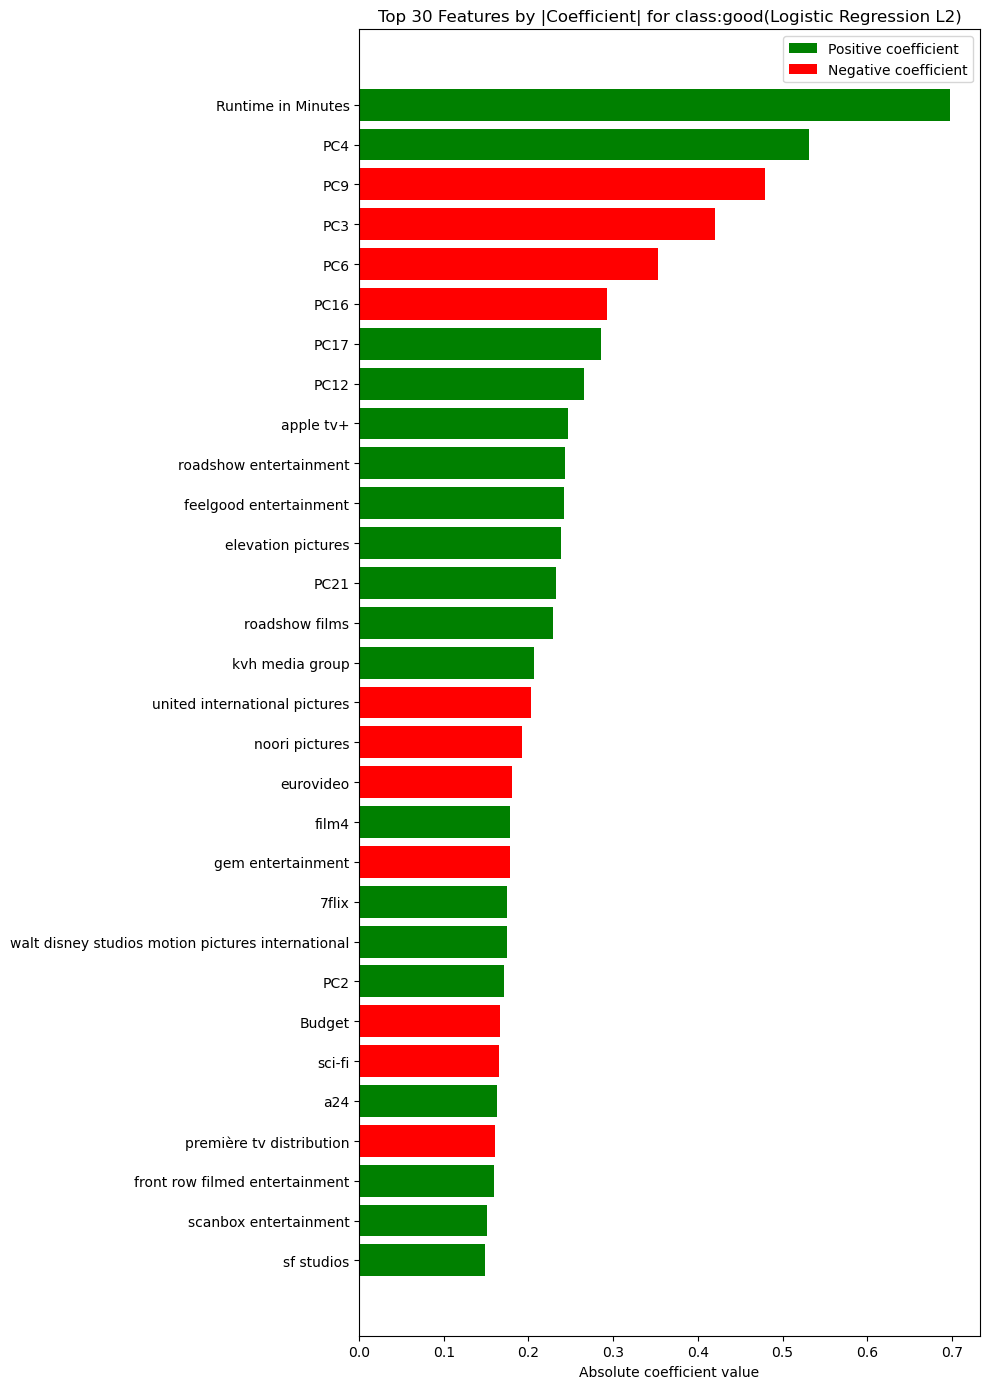

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Made with the help of ChatGPT
# === CONFIGURE THIS ===
top_n = 30          # how many features to show
horizontal = True
pos_color = 'green'
neg_color = 'red'
# ======================

# Assume you already have:
model = Classifiers['Logistic Regression (L2)']
features = list(x_train.columns)

# 1. Extract and rank by absolute magnitude
coefs = model.coef_[0]
abs_coefs = np.abs(coefs)
top_idx = np.argsort(abs_coefs)[-top_n:]
# Sort top indices so the largest is first in the bar chart
sorted_idx = top_idx[np.argsort(abs_coefs[top_idx])[::-1]]

# 2. Prepare data for plotting
names = [features[i] for i in sorted_idx]
orig_vals = coefs[sorted_idx]
abs_vals = abs_coefs[sorted_idx]
bar_colors = [pos_color if v >= 0 else neg_color for v in orig_vals]

# 3. Plot
plt.figure(figsize=(10, 0.4 * top_n + 2))

if horizontal:
    plt.barh(names, abs_vals, color=bar_colors)
    plt.gca().invert_yaxis()  # highest magnitude on top
    plt.xlabel("Absolute coefficient value")
else:
    plt.bar(names, abs_vals, color=bar_colors)
    plt.xticks(rotation=90)
    plt.ylabel("Absolute coefficient value")

# 4. Legend
legend_patches = [
    Patch(facecolor=pos_color, label="Positive coefficient"),
    Patch(facecolor=neg_color, label="Negative coefficient")
]
plt.legend(handles=legend_patches, loc='best')

class_ = model.classes_[1]

plt.title(f"Top {top_n} Features by |Coefficient| for class: {class_} (Logistic Regression L2)")
plt.tight_layout()
plt.show()

<div style="text-align: center;">

***Figure 14:*** *Plot of Top Features*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

As shown in Figure 14, Runtime emerges as the most influential predictor in the model, closely followed by seven principal components derived from the plot summaries. Additionally, several producer and distributor features contribute notably to the predictions. While the impact of producers and distributors is relatively straightforward to interpret, the principal components are more abstract. To better understand these components, we can visualize them using a biplot, which provides insight into their underlying structure.

In [ ]:
%run eda2.ipynb

Defaulting to user installation because normal site-packages is not writeable
Successfully Imported


(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC4', ylabel='PC9'>)

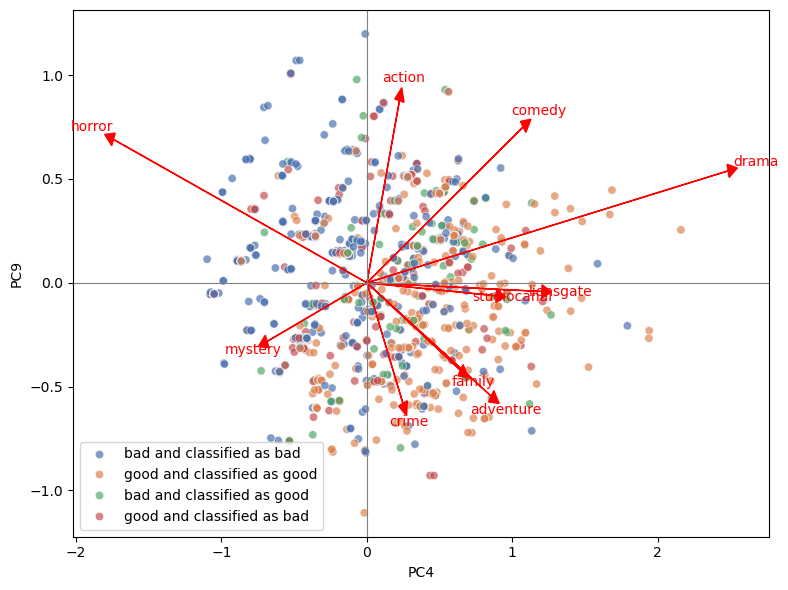

In [ ]:
y_pred   = model.predict(x_train)
y_actual = y_train

y_class = [
    f"{actual} and classified as {pred}"
    for actual, pred in zip(y_actual, y_pred)
]

biplot(
    x_train_copy[feature_dict['tokens']],
    x_train[feature_dict['PCS']],
    feature_names=None,
    pc_indices=(3, 8),
    top_arrows=10,
    arrow_scale=None,
    figsize=(8, 6),
    title=None,
    predictions=y_class
)

<div style="text-align: center;">

***Figure 15:*** *Biplot of PC4 and PC9*

</div>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 15 reveals interesting insights into the principal components. For PC4, two dominant but opposing word vectors-drama and horror-stand out. Movies with higher positive values on PC4 tend to lean towards drama, while those with negative values are more closely associated with horror, effectively capturing a drama-horror spectrum.

PC9 is somewhat less straightforward to interpret, as it features clusters of similarly sized vectors pointing in distinct directions. Genres such as horror, action, comedy, and drama align with the positive side of PC9, whereas mystery, crime, family, and adventure correspond to the negative side, suggesting a nuanced thematic separation along this component.

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC3', ylabel='PC6'>)

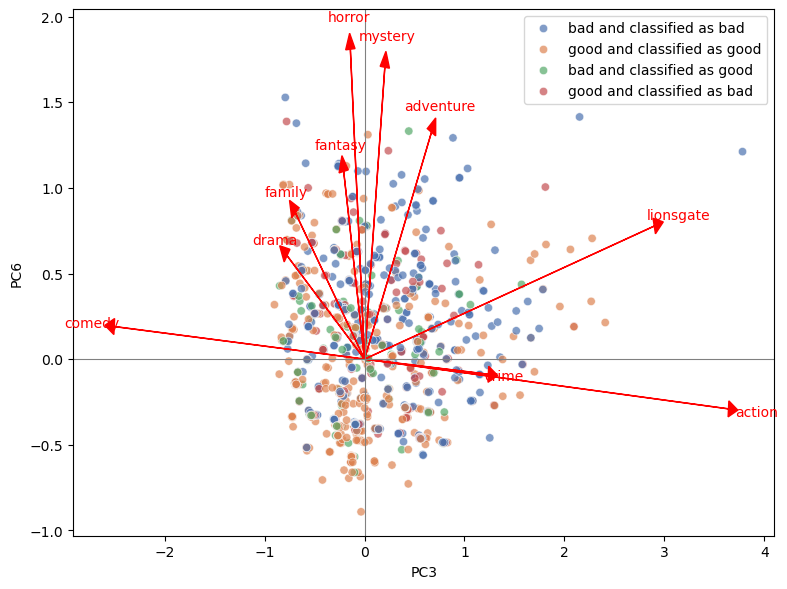

In [ ]:
biplot(
    x_train_copy[feature_dict['tokens']],
    x_train[feature_dict['PCS']],
    feature_names=None,
    pc_indices=(2, 5),
    top_arrows=10,
    arrow_scale=None,
    figsize=(8, 6),
    title=None,
    predictions=y_class
)

<div style="text-align: center;">

***Figure 16:*** *Biplot of PC3 and PC6*

</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 16 sheds light on PC3, which exhibits a clear polarization between comedy and action. Films with higher positive values on PC3 tend to be action-oriented, while those with negative values lean more towards comedy.

In contrast, PC6 does not represent a genre continuum but rather captures a cluster of related genres. Specifically, horror, mystery, adventure, and fantasy all align positively along this component, suggesting it reflects a thematic grouping rather than a spectrum.

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC16', ylabel='PC17'>)

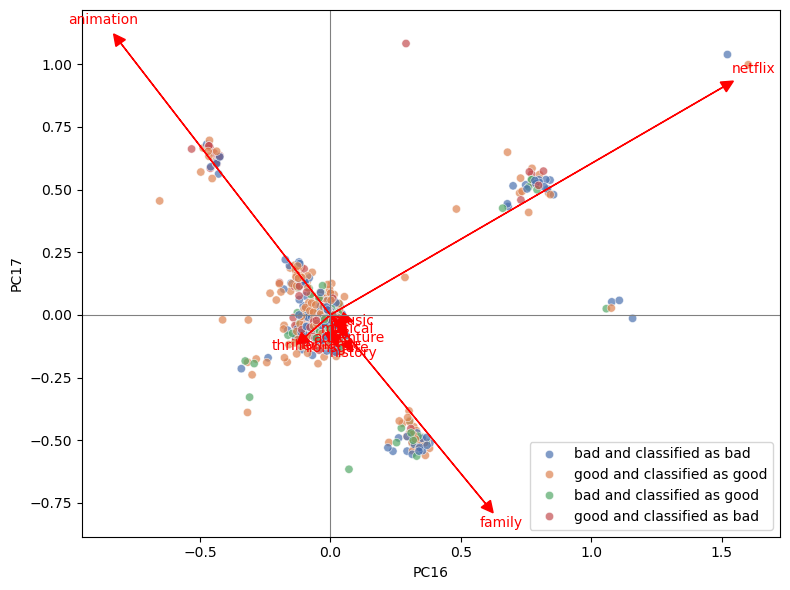

In [ ]:
biplot(
    x_train_copy[feature_dict['tokens']],
    x_train[feature_dict['PCS']],
    feature_names=None,
    pc_indices=(15, 16),
    top_arrows=10,
    arrow_scale=None,
    figsize=(8, 6),
    title=None,
    predictions=y_class
)

<div style="text-align: center;">

***Figure 17:*** *Biplot of PC16 and PC17*

</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 17 reveals distinct clusters of films; however, these groupings do not appear to directly correspond to either actual or predicted movie quality. Notably, both PCs seem to emphasize animation-related themes. Specifically, PC17 represents a continuum ranging from animation to Netflix productions, while PC16 captures a spectrum centered around animation and family genres.

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC12', ylabel='PC17'>)

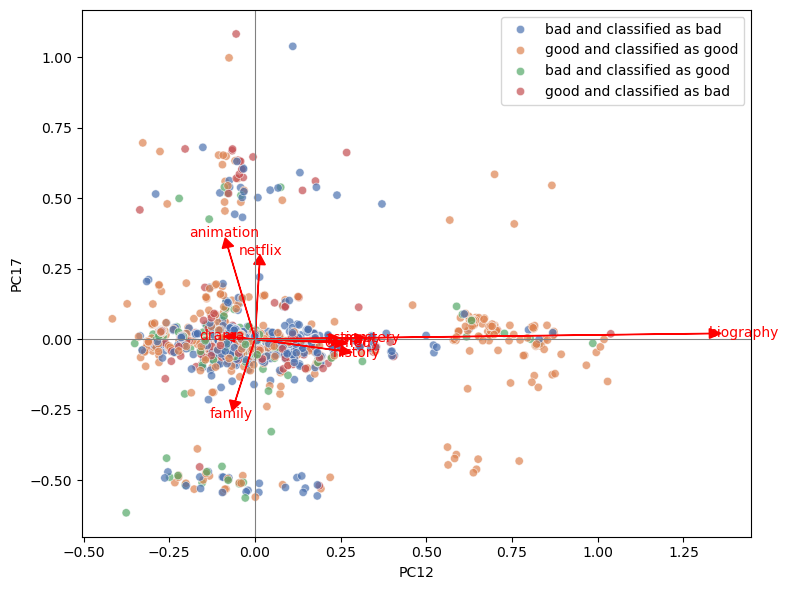

In [ ]:
biplot(
    x_train_copy[feature_dict['tokens']],
    x_train[feature_dict['PCS']],
    feature_names=None,
    pc_indices=(11, 16),
    top_arrows=10,
    arrow_scale=None,
    figsize=(8, 6),
    title=None,
    predictions=y_class
)

<div style="text-align: center;">

***Figure 18:*** *Biplot of PC12 and PC17*

</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure 18 shows that PC12, like PC6, captures a cluster of related genres. PC12 is strongly associated with biography and, to a lesser extent, history. Additionally, PC12 shares similarities with PC17, as both components reflect a movie’s position along the animation-family continuum.



<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">DISCUSSION</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

**Model Performance**

The final model demonstrates solid generalization to new data, achieving up to 72% accuracy. Using the baseline defined as $$1.25∗PCC=62.68$$, we can confidently conclude that the model possesses meaningful predictive power. Interestingly, the linear models outperformed the tree-based approaches in this task. This aligns with findings from Thomal (2024), who observed a similar pattern while conducting sentiment analysis on IMDb review ratings <a href="https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews">[2]</a>. Such consistency suggests that this domain may inherently favor linear models, although further research is necessary to confirm or refute this hypothesis. For example, it seems unlikely that increasing runtime necessarily corresponds to a proportional increase in rating. However, as this project is ultimately aimed towards aiding (not replacing) human decision making, then the interpretability associated with linear models may be more important.

**Feature Importance**

Examining the model coefficients reveals that runtime holds the highest weight——a somewhat surprising result. Initial exploratory data analysis showed that runtime had low variance, with a very narrow interquartile range, suggesting limited discriminative power. Moreover, the presence of outliers skewed runtime towards higher values. Despite these challenges, after applying a log transformation and standard scaling, runtime appears positively associated with movie ratings.

Another unexpected finding is the negative association between budget and movie rating. While prior studies, such as Murschetz et al. (2023), emphasize the importance of budget in predicting movie quality, they do not clarify whether this relationship is positive or negative <a href="https://journals.aau.dk/index.php/NJMM/article/view/5871">[3]</a>. Our results suggest that higher budgets do not necessarily translate to better ratings-a notion supported by the existence of high-budget films that underperformed, as documented on IMDb’s list of budget flops <a href="https://www.imdb.com/list/ls052417006/">[4]</a>.

Notably, actors and directors did not feature among the top 30 most important predictors. This may stem from the way these features were encoded. Unlike studies by Bruneel et al. (2023), which incorporate metrics like star power and award nominations, our model only accounts for the presence of actors and directors without weighting their influence <a href="https://journals.aau.dk/index.php/NJMM/article/view/5871/5505">[5]</a>.

This limitation is also evident in the distributors and producers features. Although some distributors and producers rank among the top 30 important features, they do not appear in the top 20 by frequency within their categories. A notable exception is United International Pictures, which ranks both as the most frequent distributor and among the top 30 important features.

**PCA**

Turning to the principal components derived from plot summary tokens, the biplot visualizations reveal that clusters do not neatly correspond to actual or predicted movie quality. One exception is a cluster of correctly identified good movies along the positive axis of PC12. This aligns with the positive coefficient of PC12, indicating that movies scoring higher on this component tend to receive higher ratings.

To better understand what it means for a movie to be “positively PC12,” we examine the original token projections in the reduced PC space. PC12 is strongly associated with biography and history tokens, suggesting it captures the ‘nonfiction-ness’ of a film. Given the positive association with rating, this implies that movies with more nonfiction elements tend to be rated higher, which may explain the purity of the True Positive cluster along PC12.

This interpretation contrasts with that of PC6. The tokens strongly linked to PC6 correspond to genres associated with ‘fantasy-ness’-a broader concept than the singular fantasy genre. Since PC6 has a negative coefficient, movies with higher ‘fantasy-ness’ tend to receive lower ratings. Together, these findings suggest that audiences may generally prefer nonfiction films over fiction.

Several principal components also represent continuums between genres. For example, PC4 appears to capture a horror-drama spectrum. Based on token directions and the PC coefficient, movies leaning towards drama tend to rate higher, while those leaning towards horror rate lower. A similar pattern emerges in PC3, where films leaning towards comedy receive higher ratings compared to those leaning towards action.


---

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">CONCLUSION</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

In summary, the team successfully developed a predictive model that classifies movie quality with an accuracy of 72%. While the set of features used is not exhaustive, the model’s performance is significantly better than random chance, demonstrating its practical value. However, filmmaking remains a complex and creative process influenced by numerous dynamic factors beyond what any model can capture. Therefore, this model should not be viewed as a definitive arbiter of which movies ought to be produced, but rather as a complementary tool to support decision-making within a broader, multi-step evaluation framework.

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">REFERENCES</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<a id="ref1" href="https://www.imdb.com/title/tt4154796">[1] Avengers: Endgame”.IMDB. accessed April 22, 2025. https://www.imdb.com/title/tt4154796 </a>

<a id="ref1" href="https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews">[2] Thomal, S. (2024). Sentiment analysis of IMDb movie reviews. ResearchGate. https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews</a>

<a id="ref1" href="https://journals.aau.dk/index.php/NJMM/article/view/5871">[3] Murschetz, P. C., Teichmann, R., & Karmasin, M. (2023). Movie quality prediction: The role of budget. Nordic Journal of Media Management, 4(1), 1–15. https://journals.aau.dk/index.php/NJMM/article/view/5871</a>

<a id="ref1" href="https://www.imdb.com/list/ls052417006/">[4] Box office bombs: The biggest movie flops. (n.d.). IMDb. https://www.imdb.com/list/ls052417006/</a>

<a id="ref1" href="https://journals.aau.dk/index.php/NJMM/article/view/5871/5505">[5] Bruneel, S., et al. (2023). Star power and director power in movie success. Nordic Journal of Media Management, 4(1), 16–29. https://journals.aau.dk/index.php/NJMM/article/view/5871/5505
</a>

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### External Resources Used

<a id="ref1" href="https://www.filmratings.com/">[a] Film Ratings. (n.d.). Retrieved May 11, 2025, from https://www.filmratings.com/ </a>

<a id="ref1" href="https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism">[b] D'Addario, D. (2018, October 29). Over half of the movies released in the last 50 years were rated R. Vox. https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism</a>